In [200]:
import matplotlib.pyplot as plt
import time
from mlrose_hiive import simulated_annealing, random_hill_climb, mimic, genetic_alg
from mlrose_hiive import OneMax
from mlrose_hiive import FlipFlop
from mlrose_hiive import DiscreteOpt
from mlrose_hiive.algorithms import GeomDecay
import mlrose_hiive
import pandas as pd

In [4]:
# fitness = OneMax()
# problem = DiscreteOpt(length=100, fitness_fn=fitness)
problem = mlrose_hiive.KnapsackGenerator()
# problem.set_mimic_fast_mode(True)

In [3]:
# fitness = FlipFlop()
# problem = DiscreteOpt(length=100, fitness_fn=fitness)
# problem.set_mimic_fast_mode(True)

In [38]:
# best_state, best_fitness, curve = random_hill_climb(problem, max_iters=10000, restarts=50, curve=True)
# print(best_fitness)
# print(curve.shape)

604.0
(224, 2)


In [75]:
PROBLEM_SIZE = 100
problem = mlrose_hiive.KnapsackGenerator().generate(42)
restarts = [1, 10, 50, 100, 150]
rh_runner = mlrose_hiive.RHCRunner(problem, seed=42, experiment_name='RHC_Knapsack_100',
                                  iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5, 5000], output_directory='output',
                                  max_attempts=100, restart_list=restarts)
k_rhc_stats_100, k_rhc_curve_100 = rh_runner.run()

In [76]:
k_rhc_stats_100[k_rhc_stats_100.Fitness == k_rhc_stats_100.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
202,200.0,208.0,3976,5.570652,"[4, 4, 3, 4, 4, 0, 4, 4, 2, 4]",50,5000,27
203,500.0,208.0,3976,5.570652,"[4, 4, 3, 4, 4, 0, 4, 4, 2, 4]",50,5000,27
204,5000.0,208.0,3976,5.570652,"[4, 4, 3, 4, 4, 0, 4, 4, 2, 4]",50,5000,27
457,200.0,208.0,3976,8.325455,"[4, 4, 3, 4, 4, 0, 4, 4, 2, 4]",100,5000,27
458,500.0,208.0,3976,8.325455,"[4, 4, 3, 4, 4, 0, 4, 4, 2, 4]",100,5000,27
459,5000.0,208.0,3976,8.325455,"[4, 4, 3, 4, 4, 0, 4, 4, 2, 4]",100,5000,27
962,200.0,208.0,3976,14.284671,"[4, 4, 3, 4, 4, 0, 4, 4, 2, 4]",150,5000,27
963,500.0,208.0,3976,14.284671,"[4, 4, 3, 4, 4, 0, 4, 4, 2, 4]",150,5000,27
964,5000.0,208.0,3976,14.284671,"[4, 4, 3, 4, 4, 0, 4, 4, 2, 4]",150,5000,27


In [26]:
k_rhc_curve_100.head()

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000117,177.0,0.0,1,5000,0
1,1,0.005413,177.0,1.0,1,5000,0
2,2,0.005497,182.0,3.0,1,5000,0
3,3,0.005534,182.0,4.0,1,5000,0
4,4,0.005574,182.0,5.0,1,5000,0


<AxesSubplot:xlabel='Restarts Problem size 5', ylabel='Fitness'>

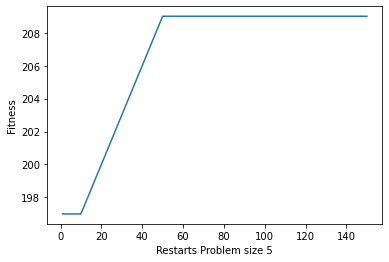

In [73]:
# fig = plt.figure()
# k_rhc_curve_100.groupby(k_rhc_curve_100['Restarts']).plot(x='Iteration', y='Fitness')
# k_rhc_stats_100.set_index('Iteration').groupby('Restarts')['Fitness'].plot(legend=True, logx=True)
# k_rhc_stats_100[k_rhc_stats_100.Restarts==1].plot(legend=True, x='Iteration', y='Fitness')
k_rhc_stats_100.groupby(['Restarts']).max()['Fitness'].plot(xlabel='Restarts Problem size 5', ylabel='Fitness')

Restarts  current_restart
1         0                  AxesSubplot(0.125,0.125;0.775x0.755)
          1                  AxesSubplot(0.125,0.125;0.775x0.755)
10        0                  AxesSubplot(0.125,0.125;0.775x0.755)
          1                  AxesSubplot(0.125,0.125;0.775x0.755)
          2                  AxesSubplot(0.125,0.125;0.775x0.755)
                                             ...                 
150       146                AxesSubplot(0.125,0.125;0.775x0.755)
          147                AxesSubplot(0.125,0.125;0.775x0.755)
          148                AxesSubplot(0.125,0.125;0.775x0.755)
          149                AxesSubplot(0.125,0.125;0.775x0.755)
          150                AxesSubplot(0.125,0.125;0.775x0.755)
Length: 316, dtype: object

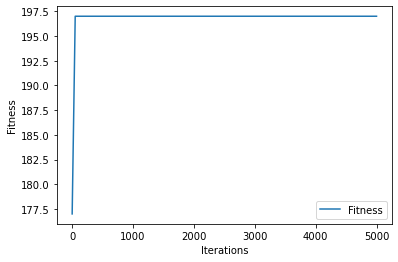

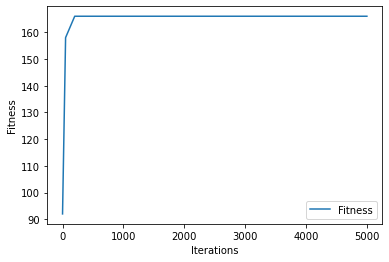

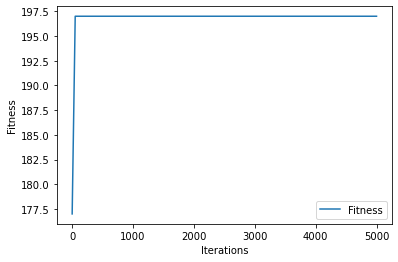

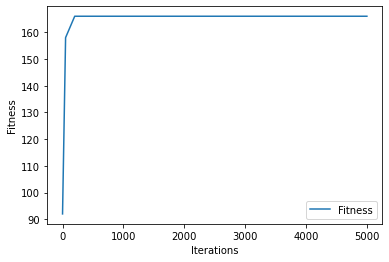

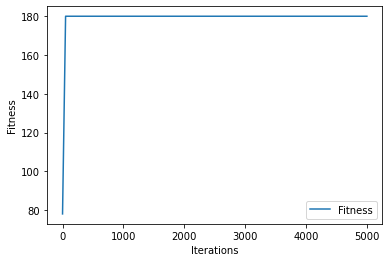

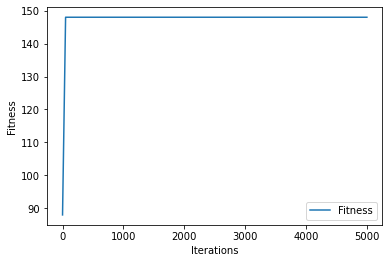

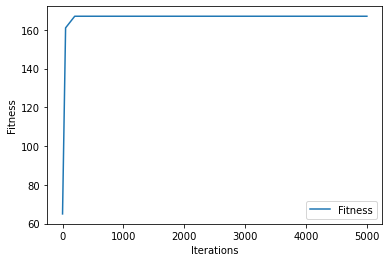

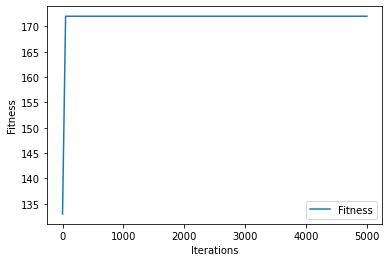

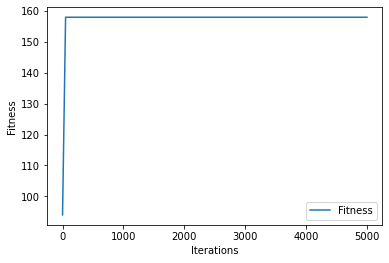

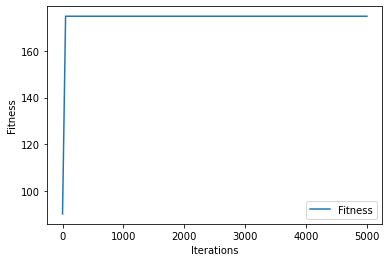

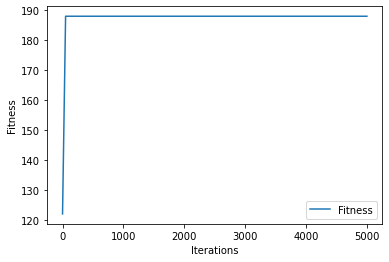

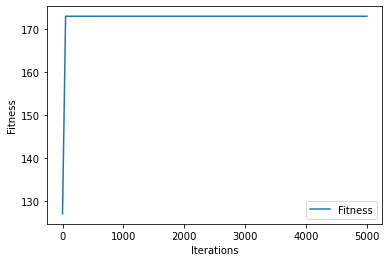

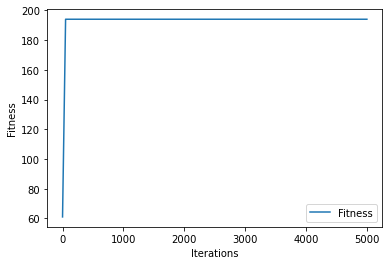

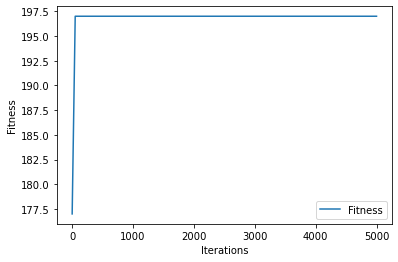

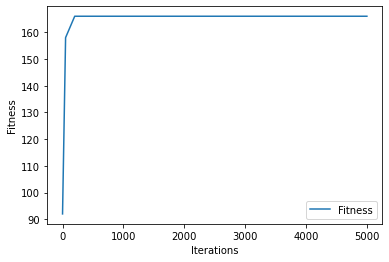

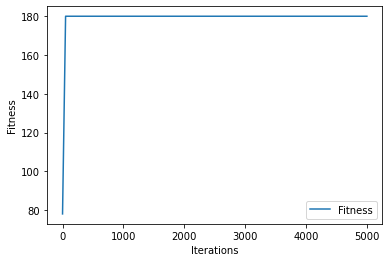

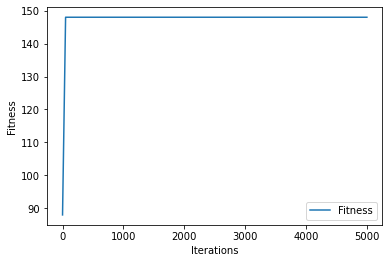

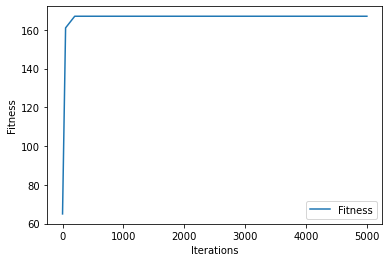

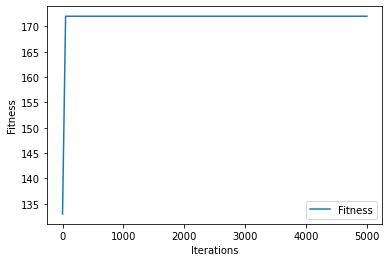

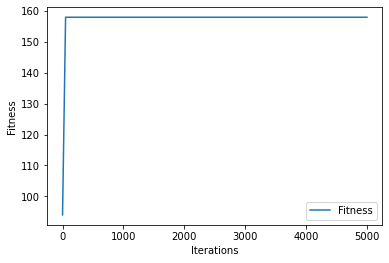

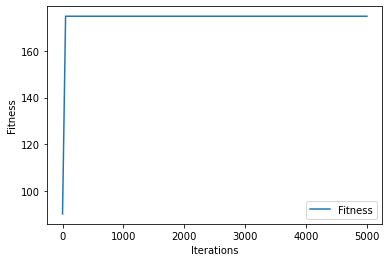

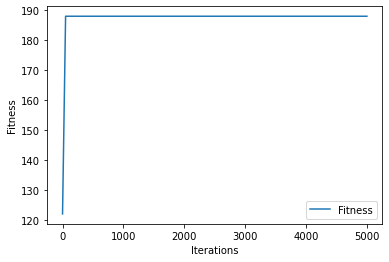

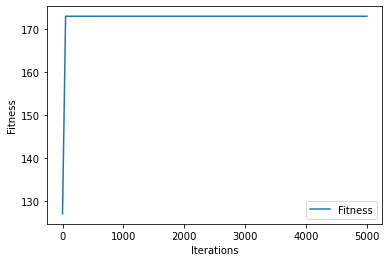

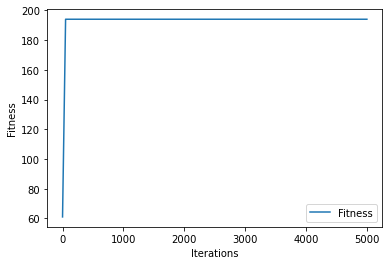

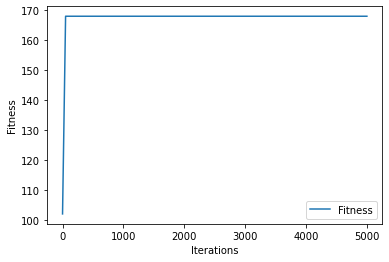

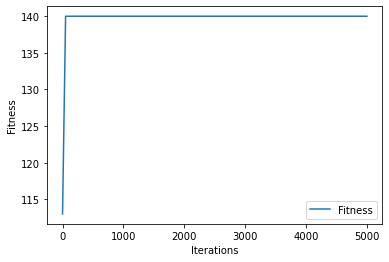

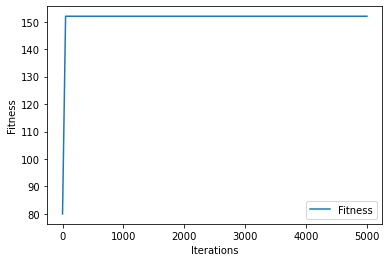

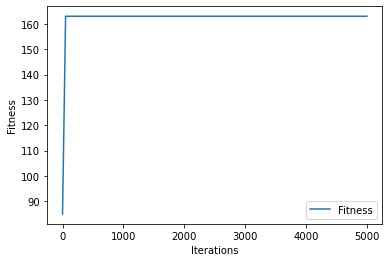

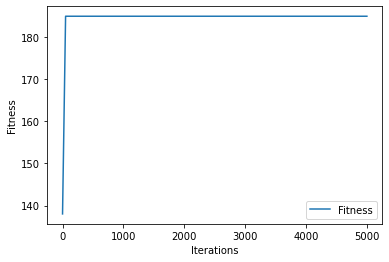

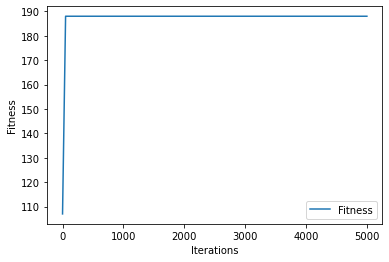

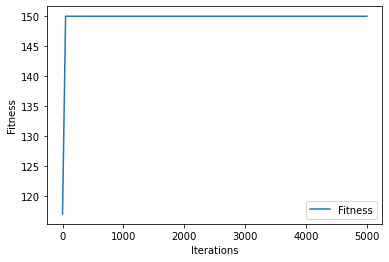

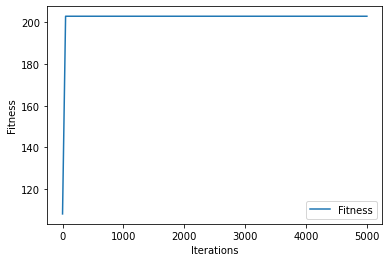

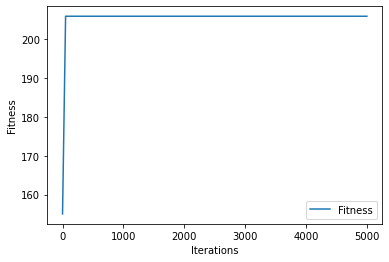

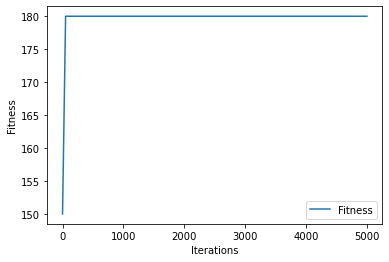

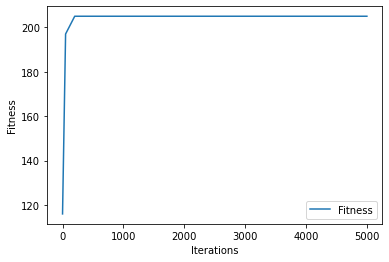

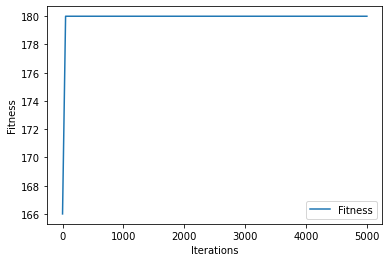

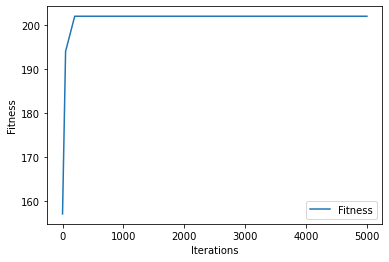

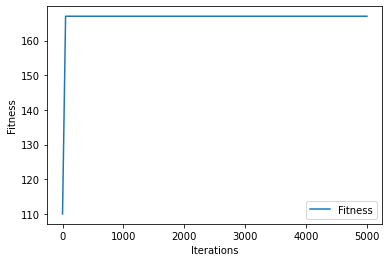

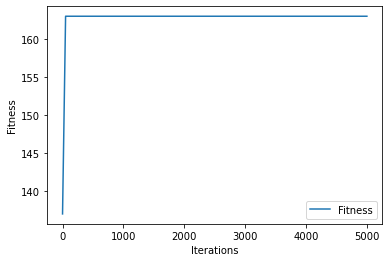

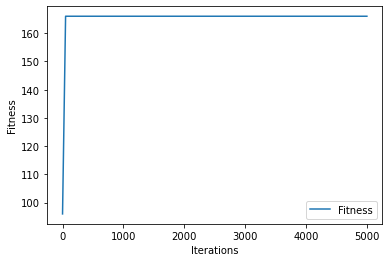

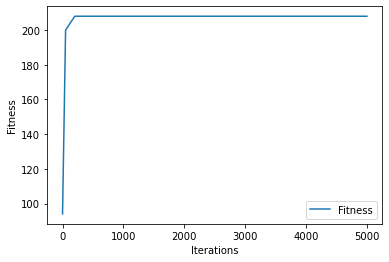

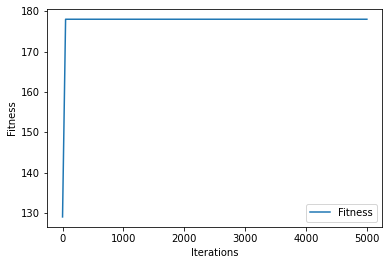

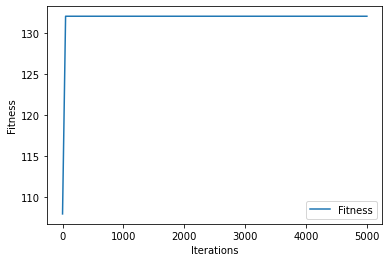

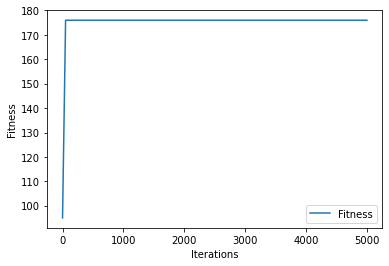

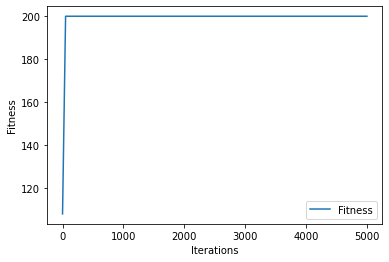

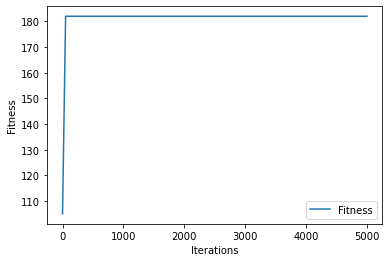

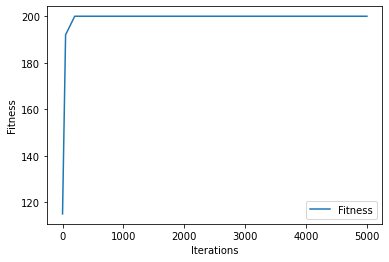

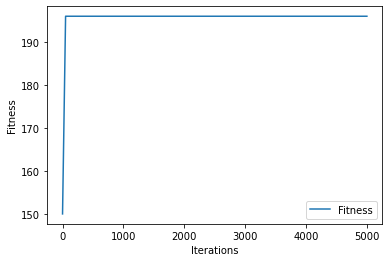

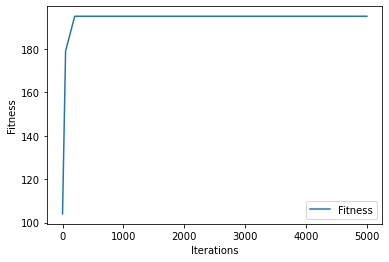

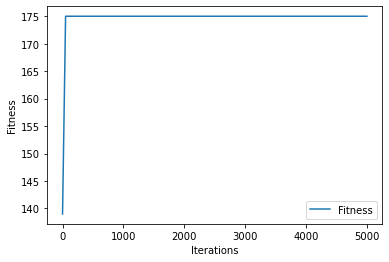

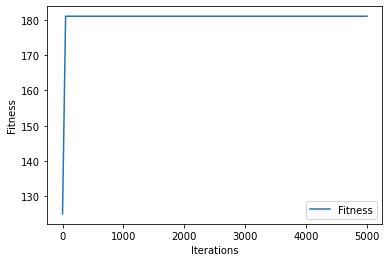

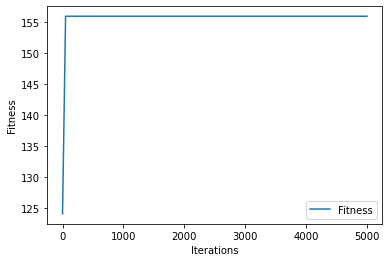

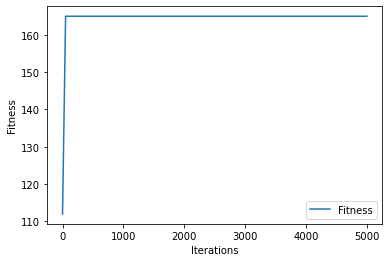

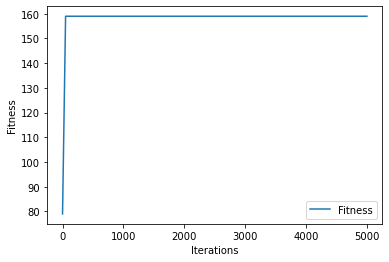

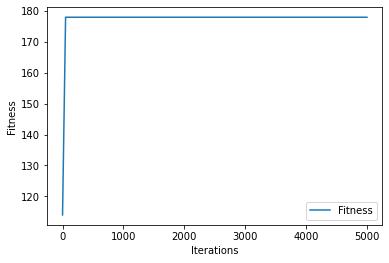

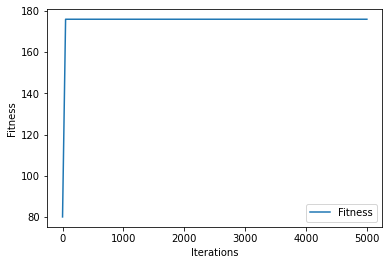

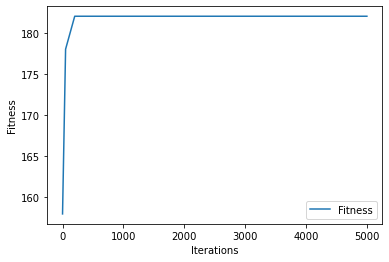

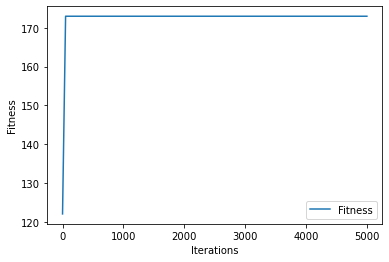

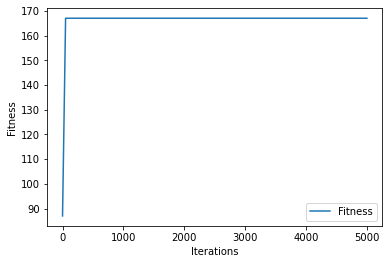

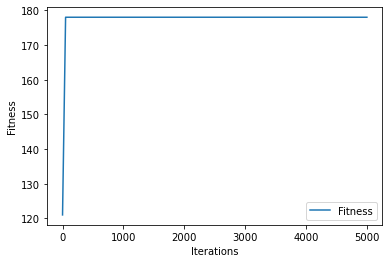

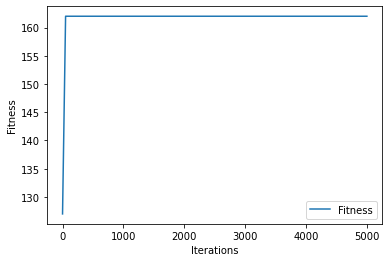

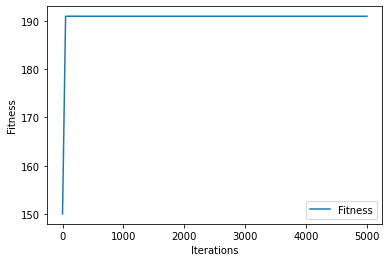

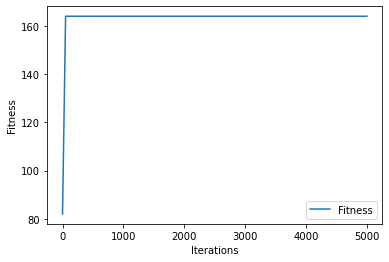

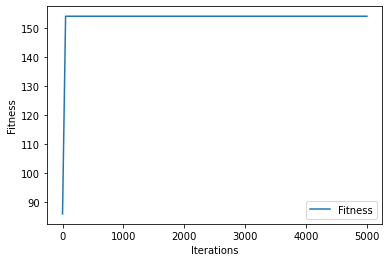

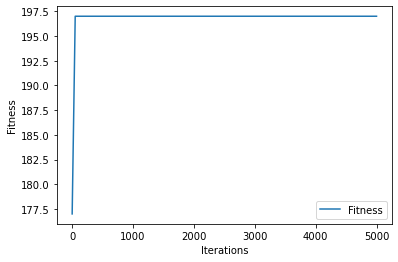

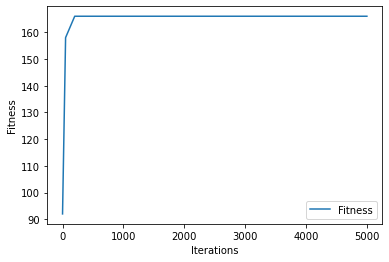

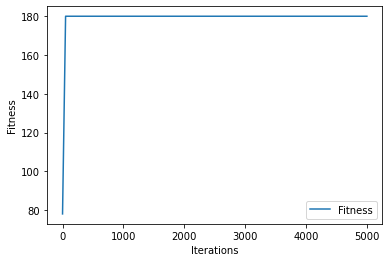

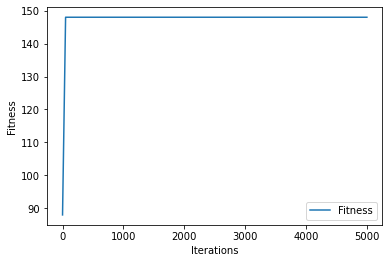

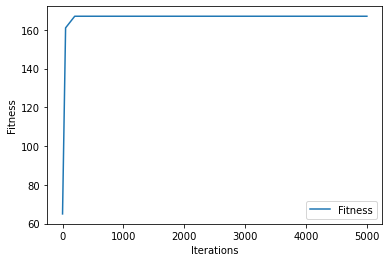

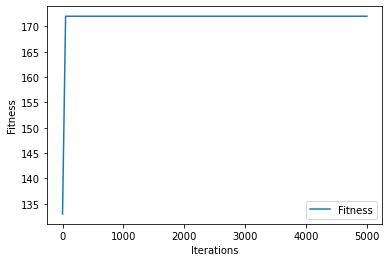

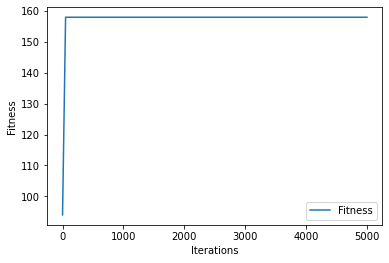

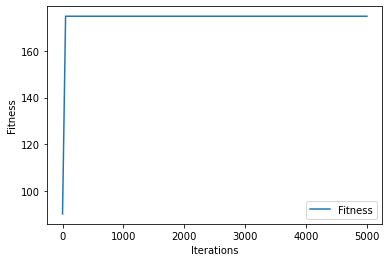

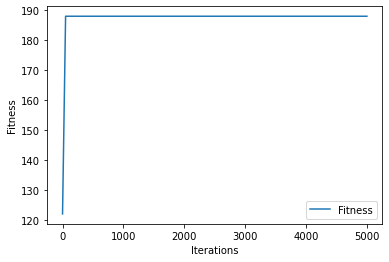

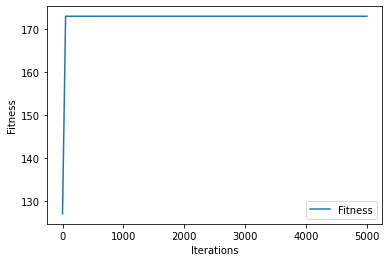

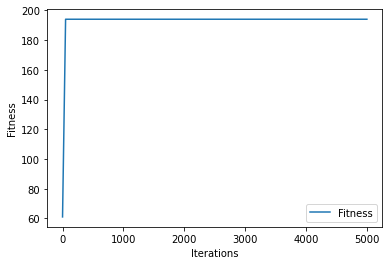

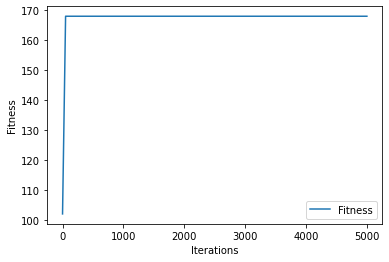

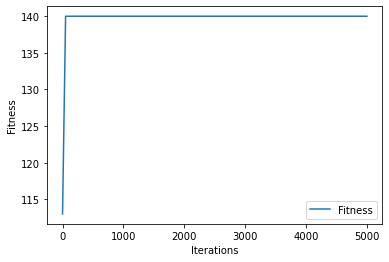

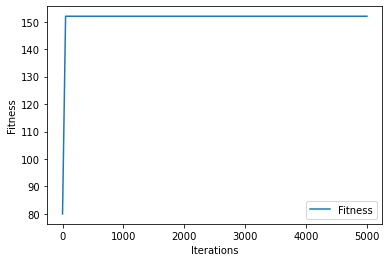

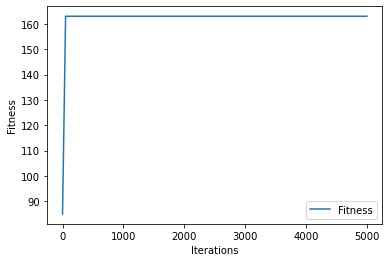

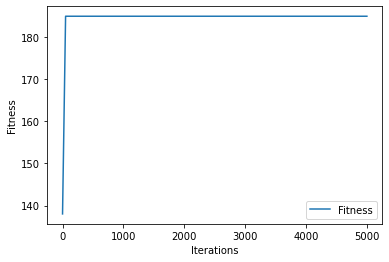

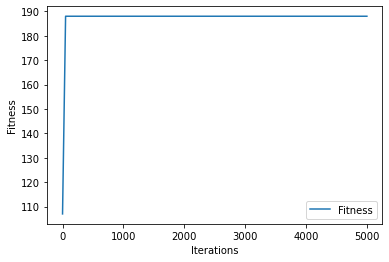

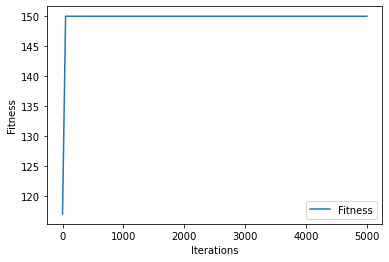

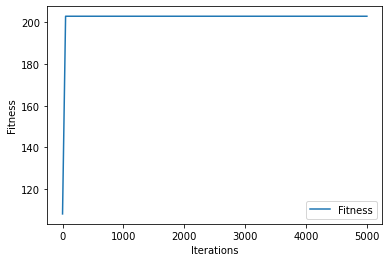

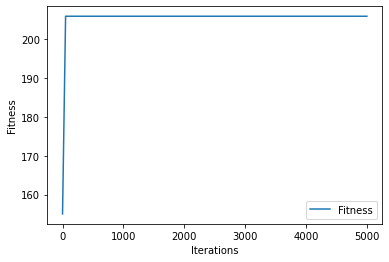

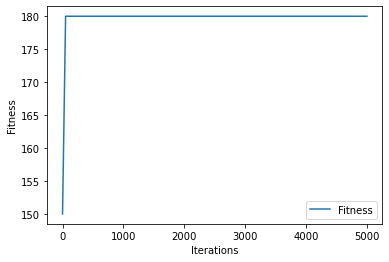

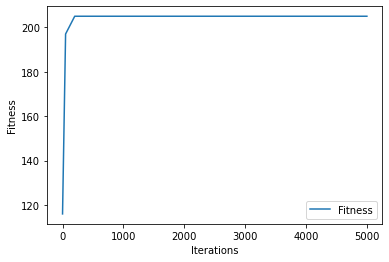

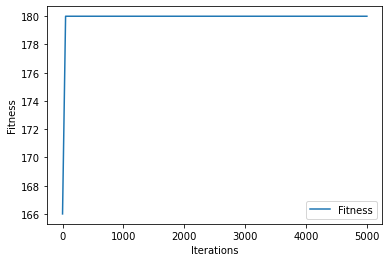

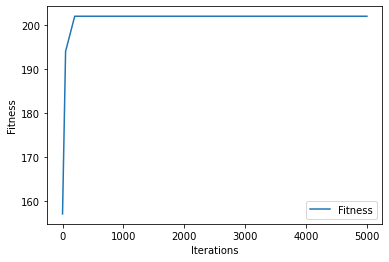

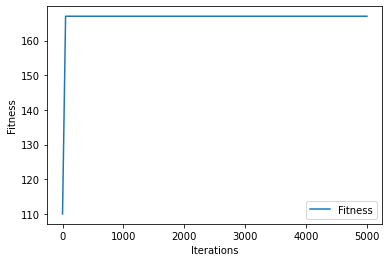

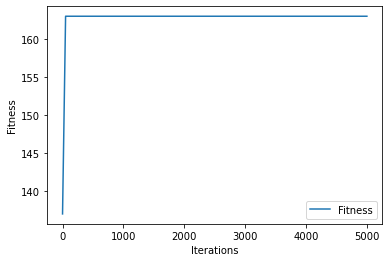

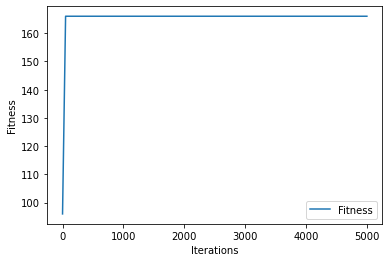

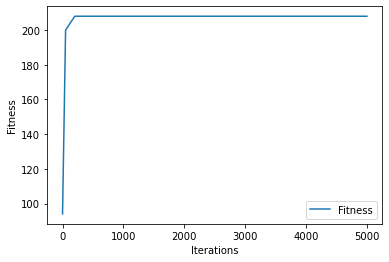

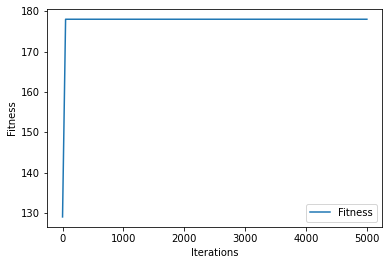

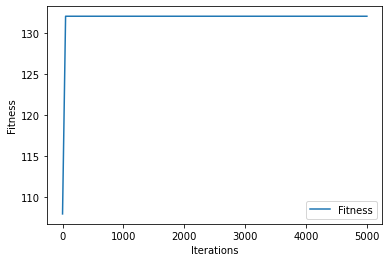

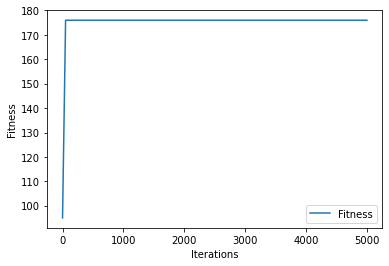

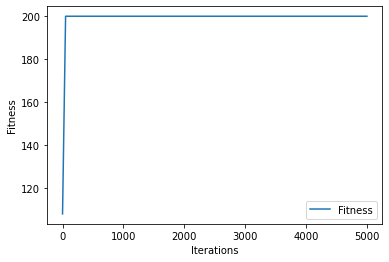

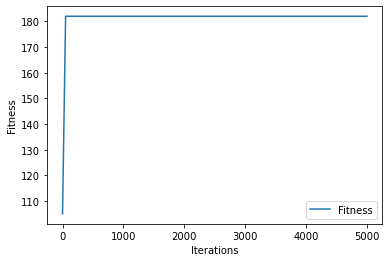

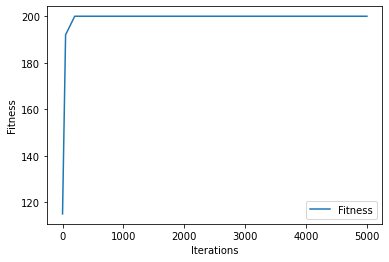

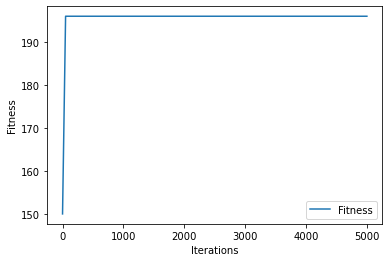

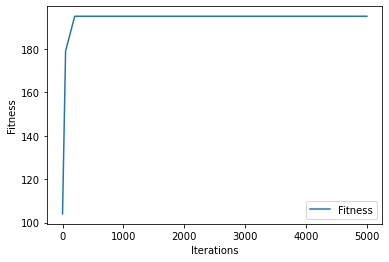

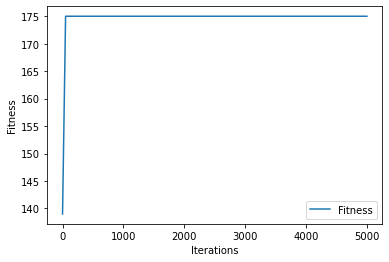

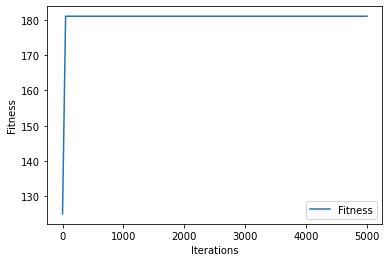

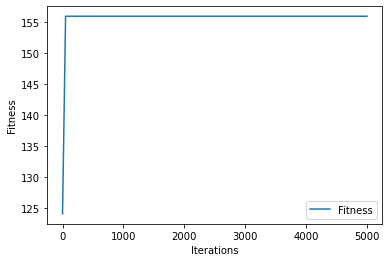

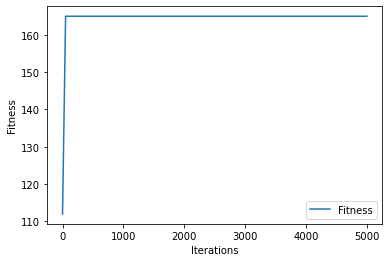

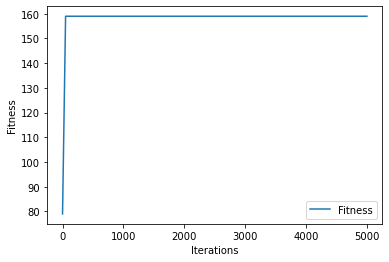

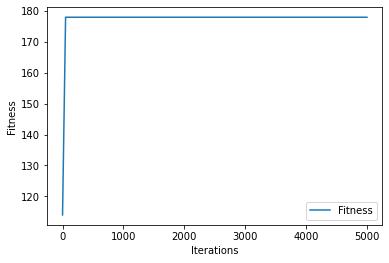

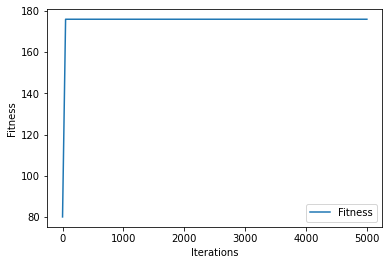

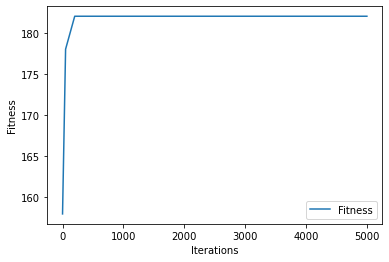

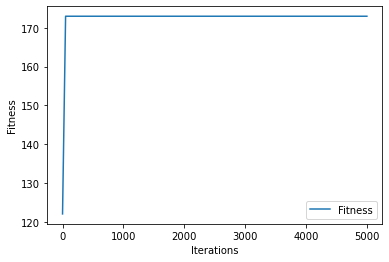

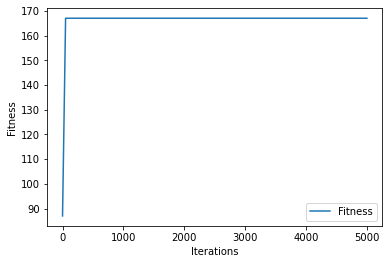

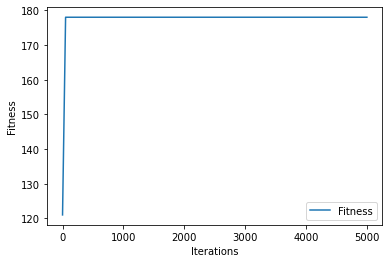

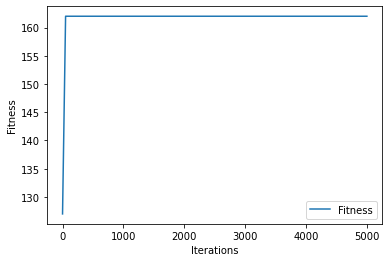

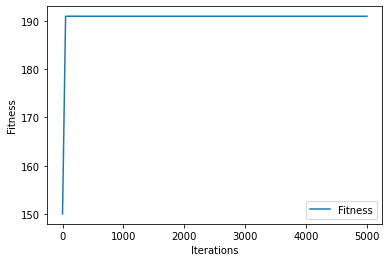

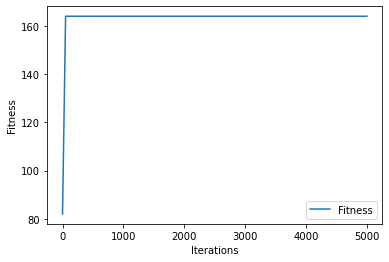

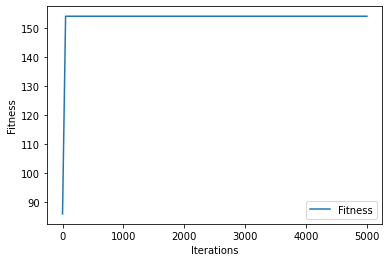

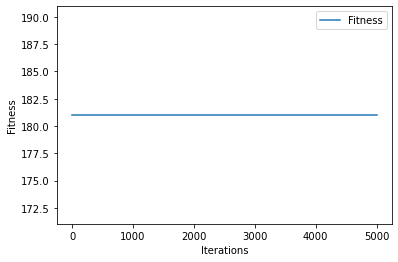

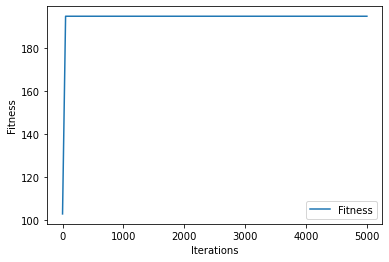

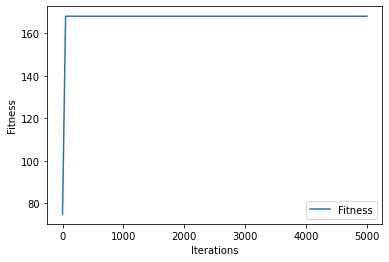

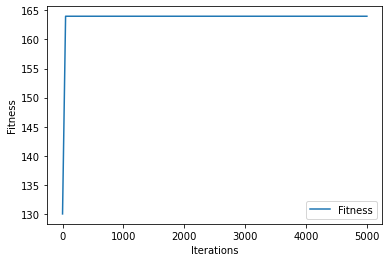

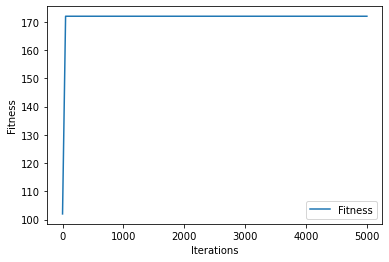

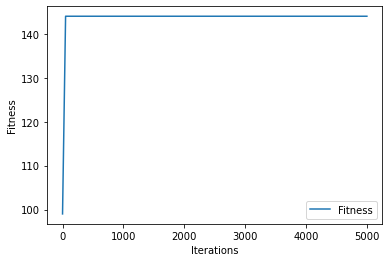

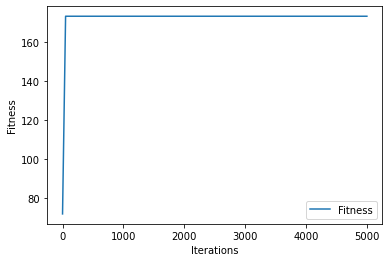

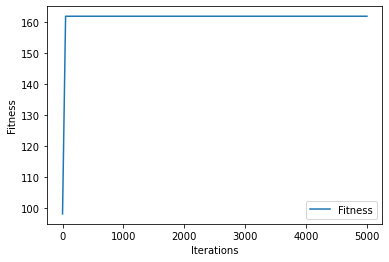

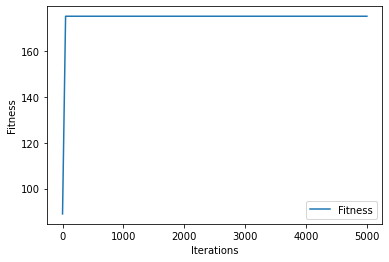

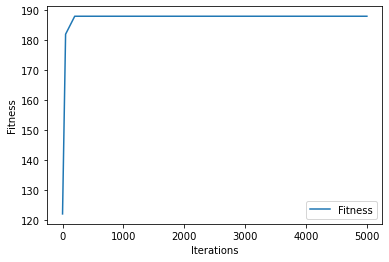

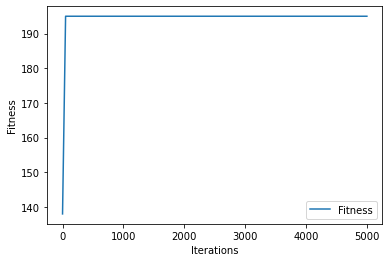

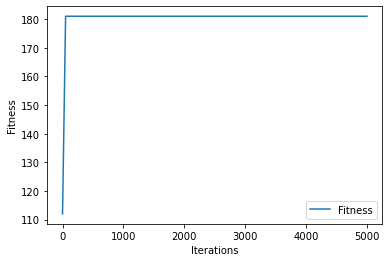

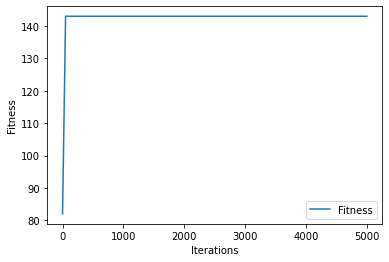

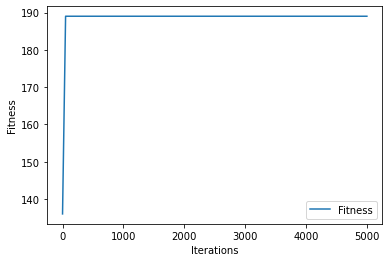

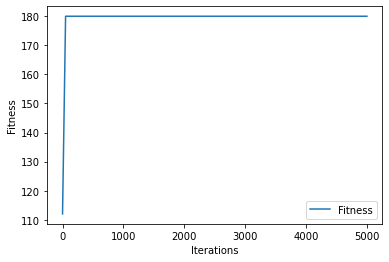

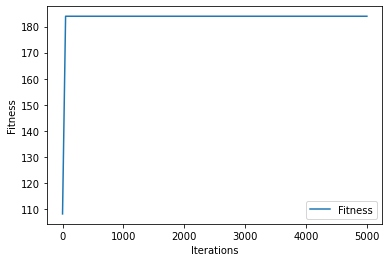

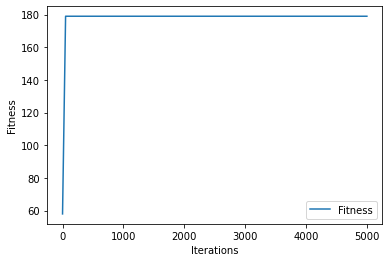

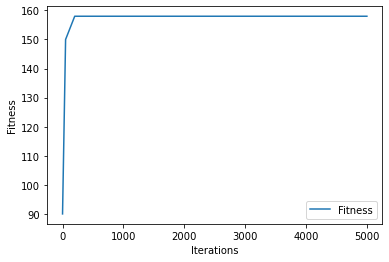

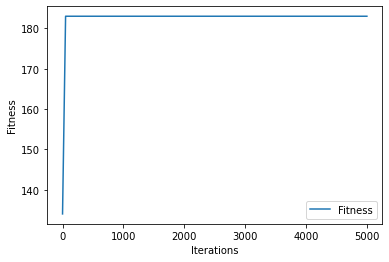

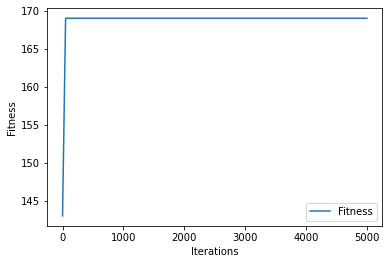

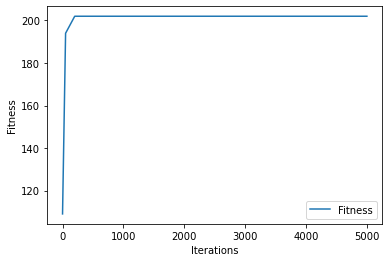

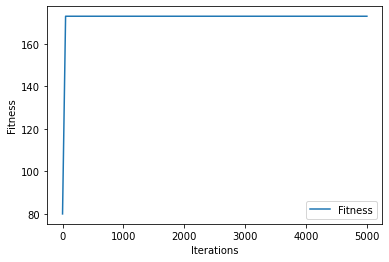

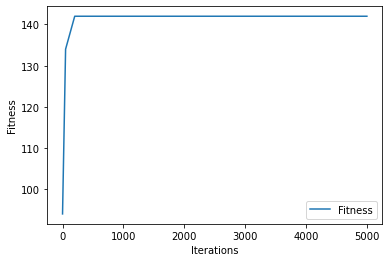

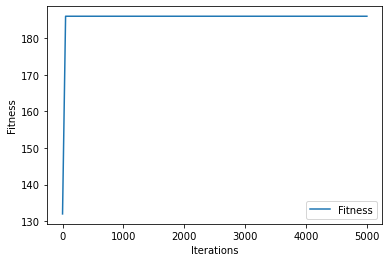

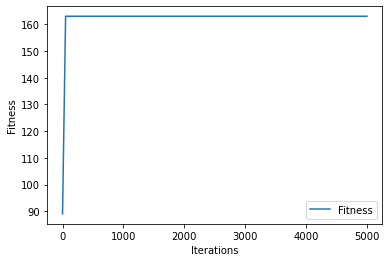

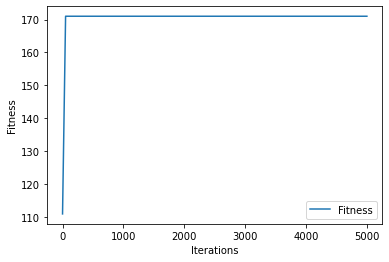

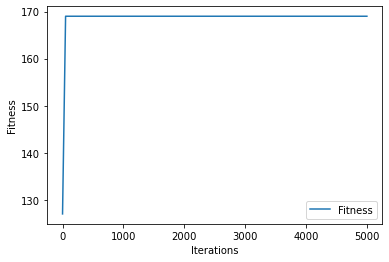

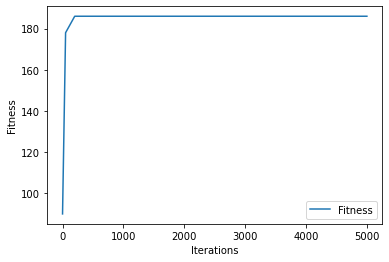

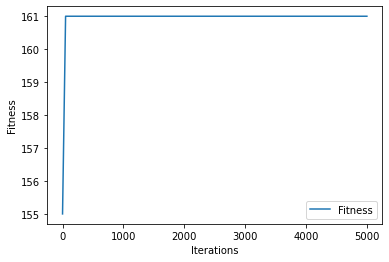

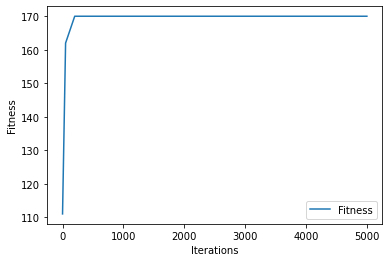

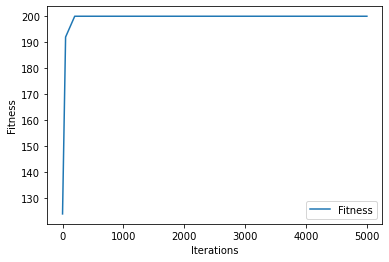

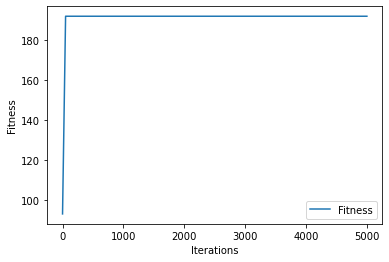

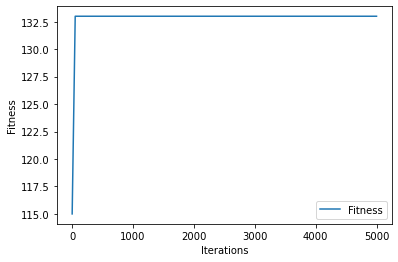

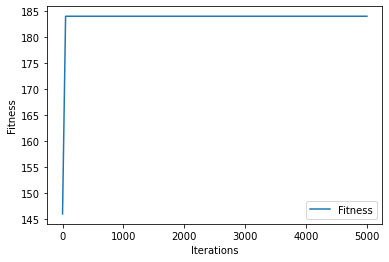

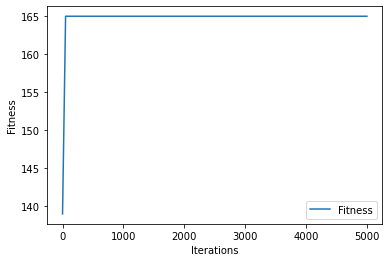

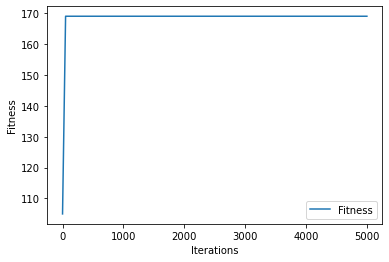

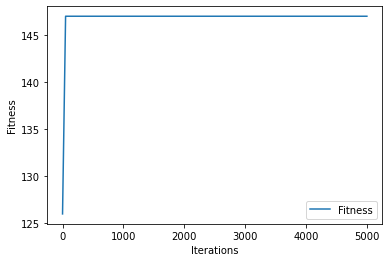

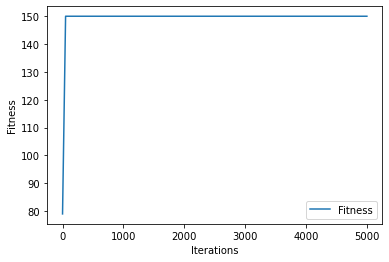

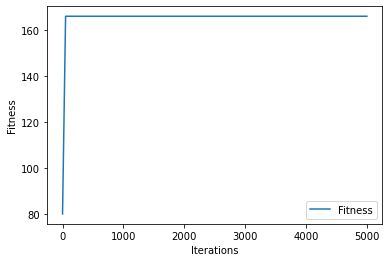

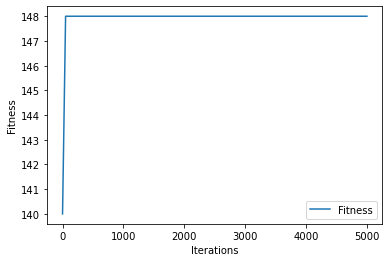

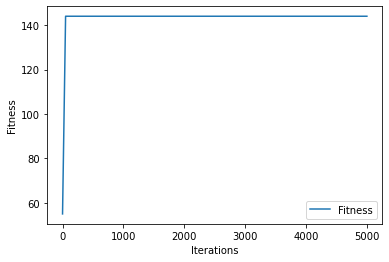

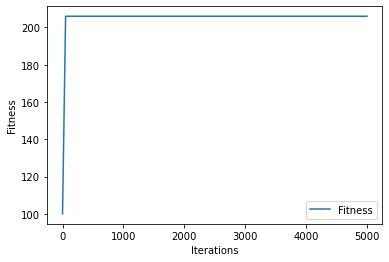

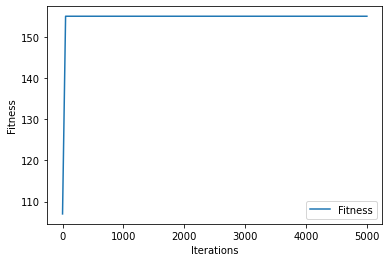

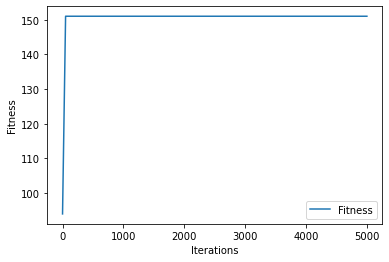

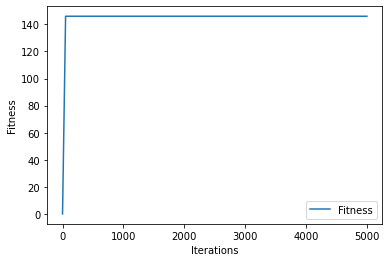

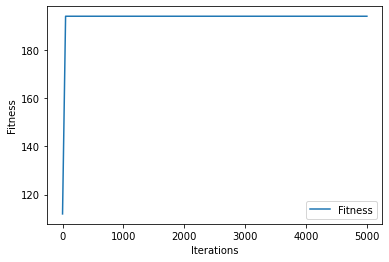

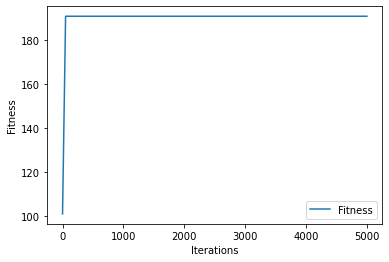

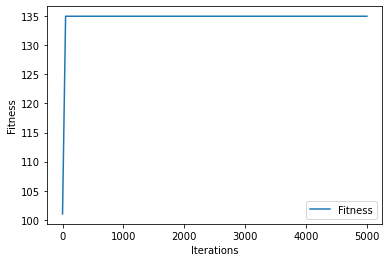

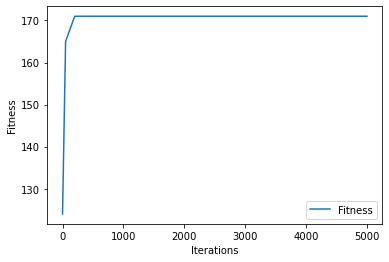

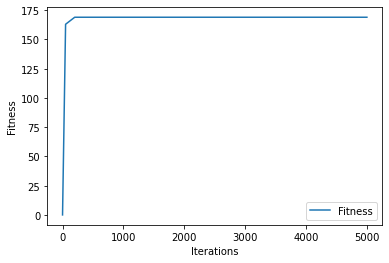

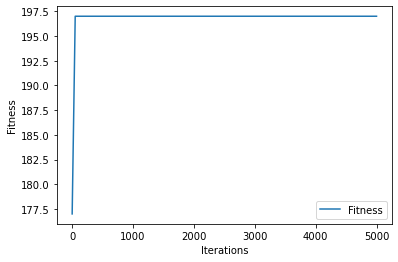

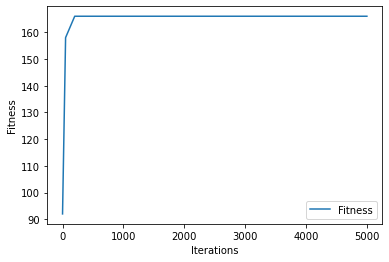

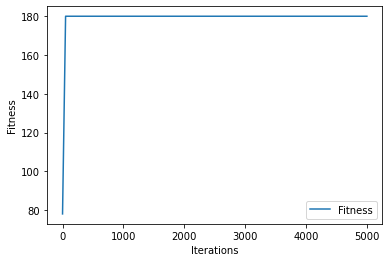

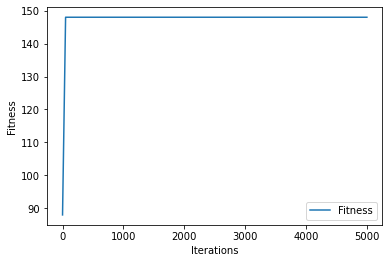

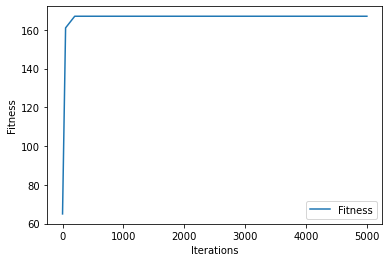

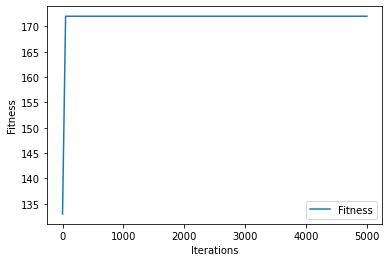

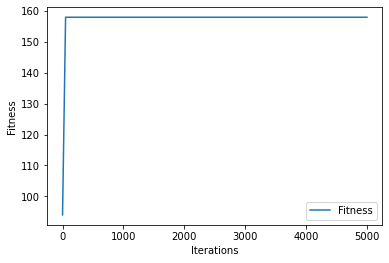

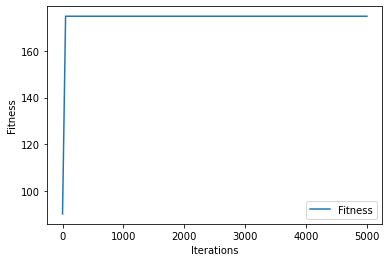

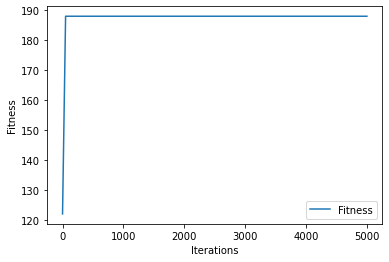

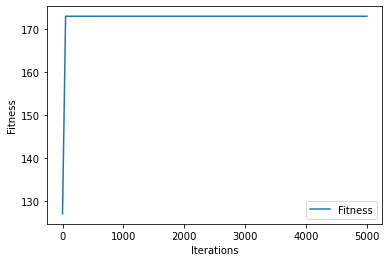

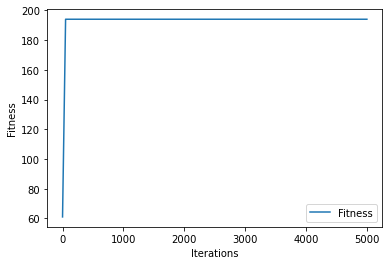

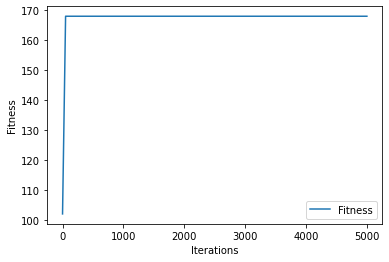

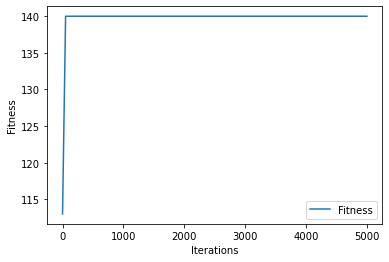

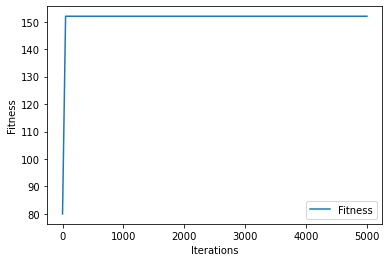

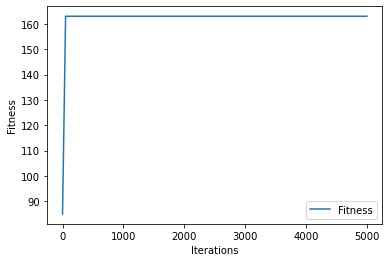

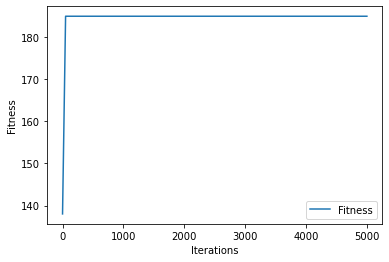

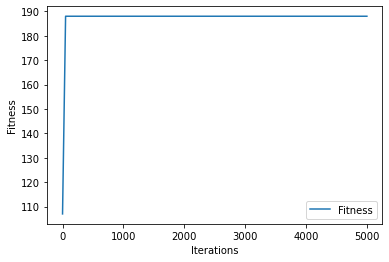

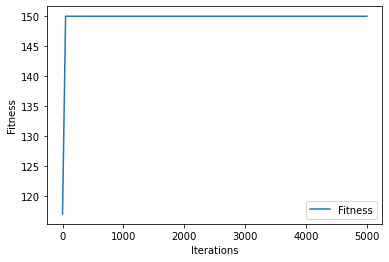

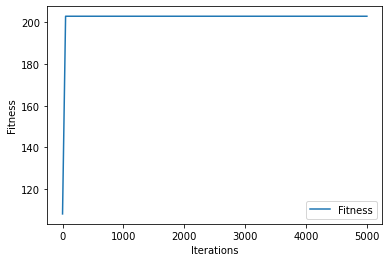

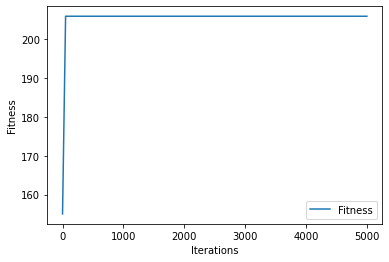

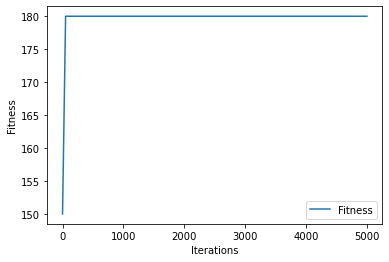

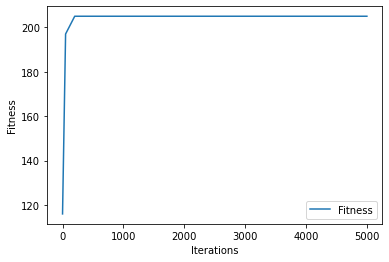

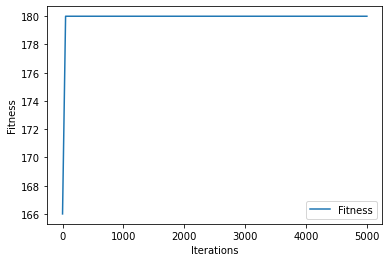

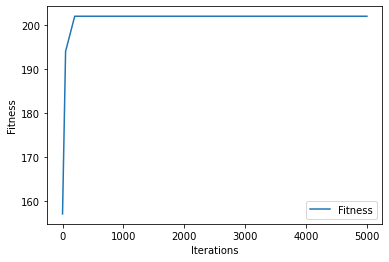

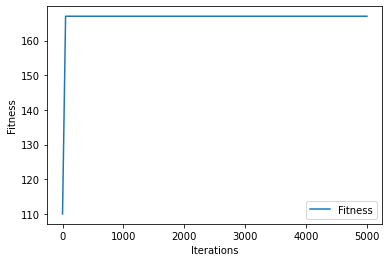

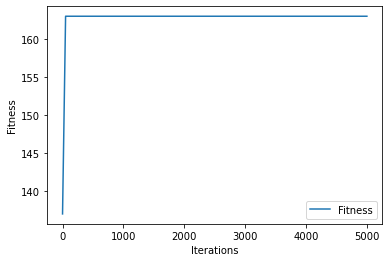

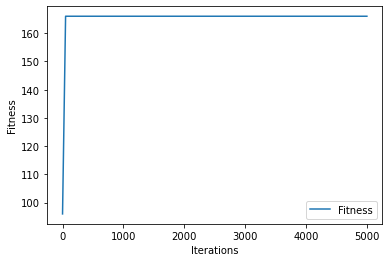

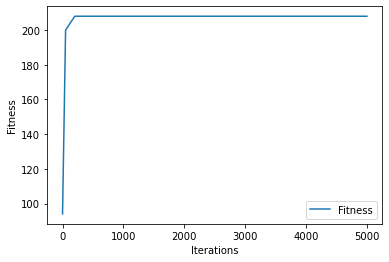

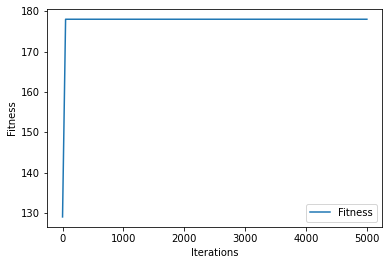

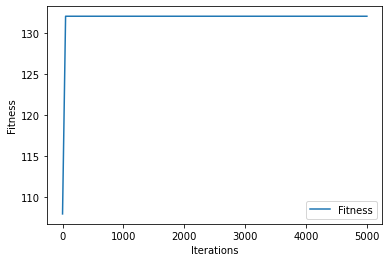

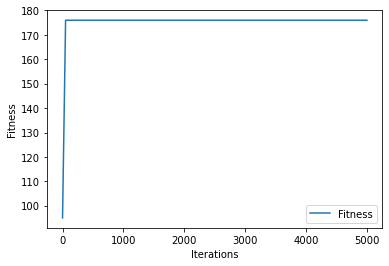

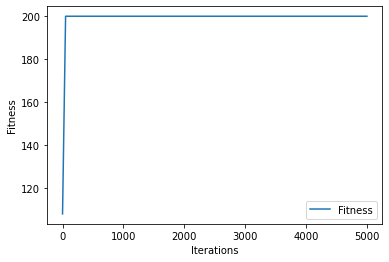

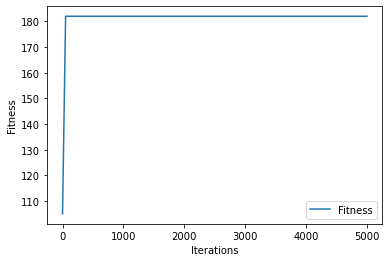

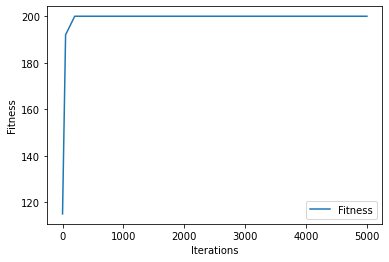

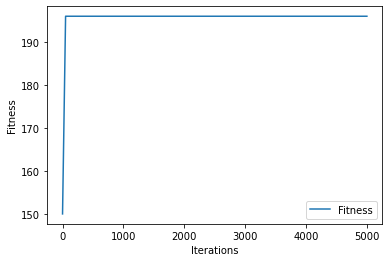

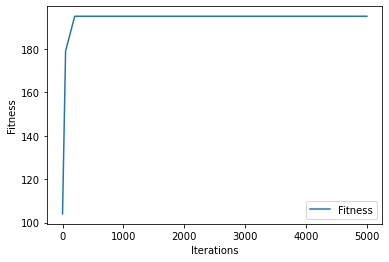

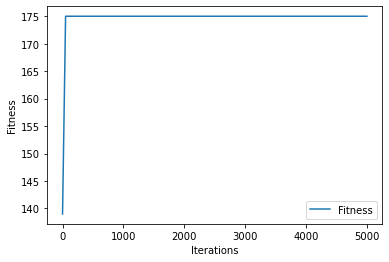

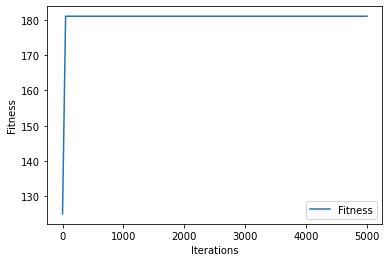

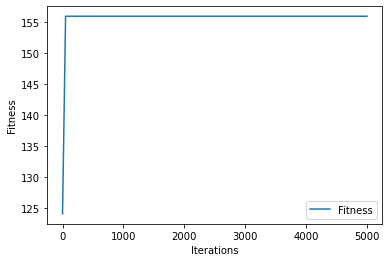

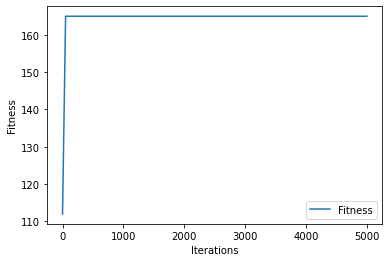

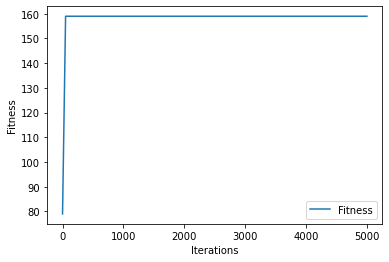

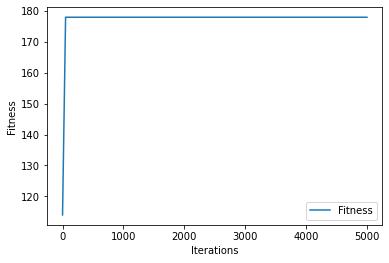

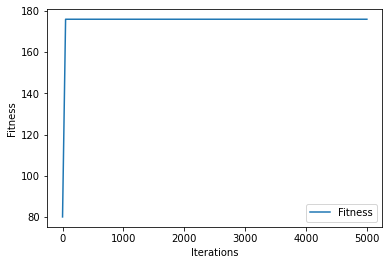

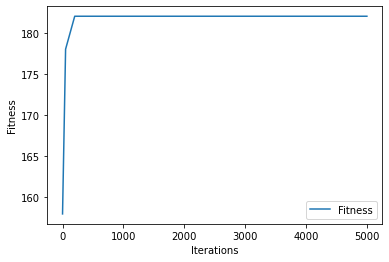

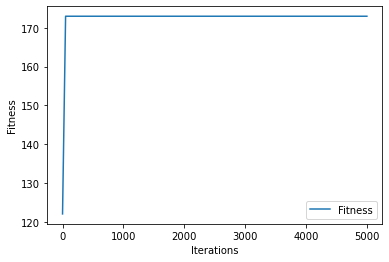

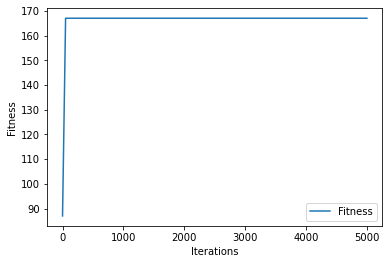

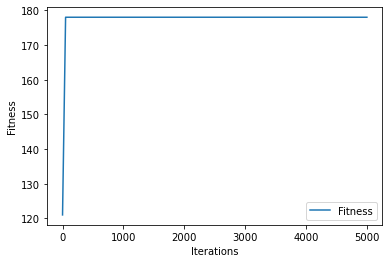

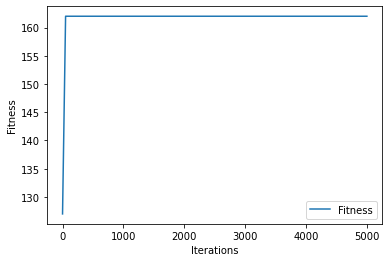

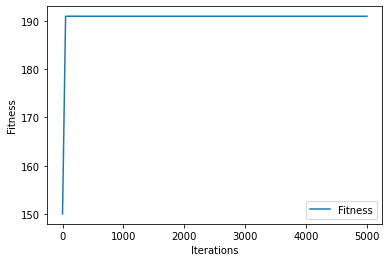

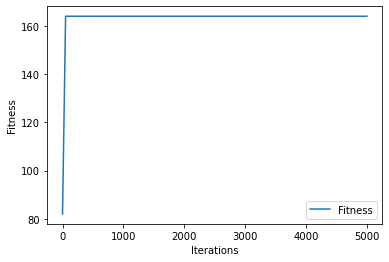

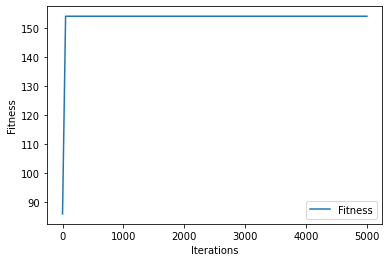

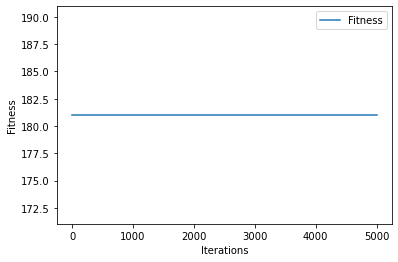

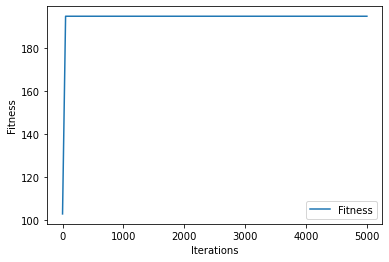

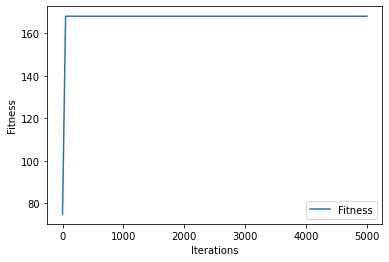

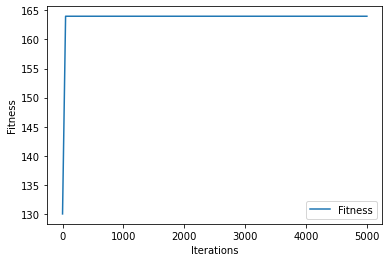

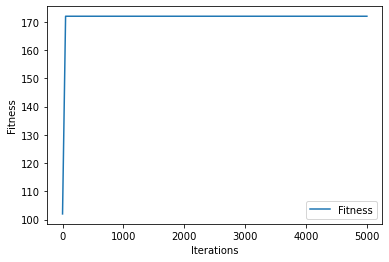

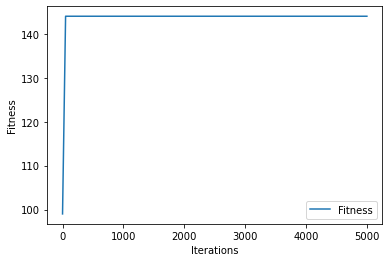

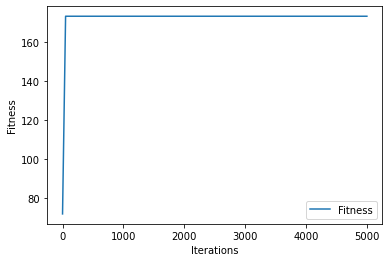

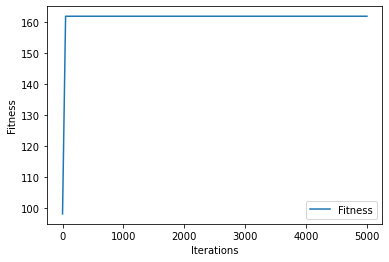

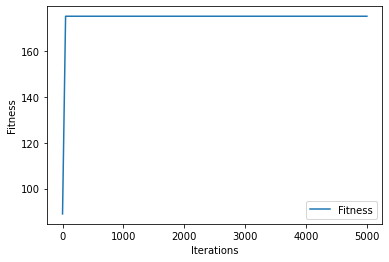

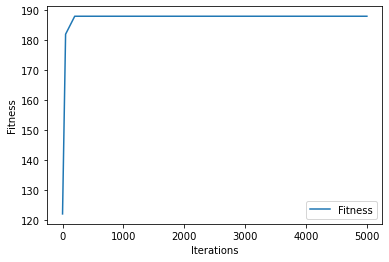

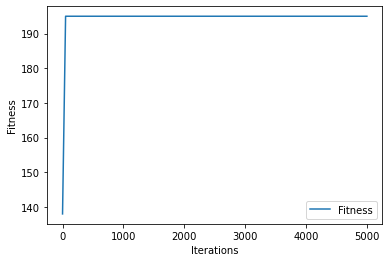

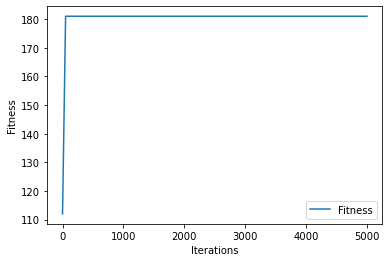

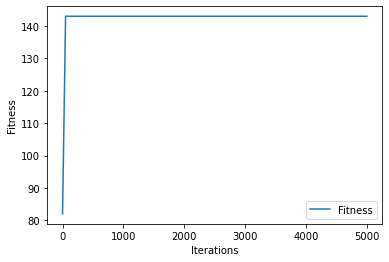

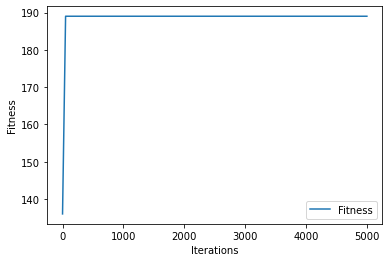

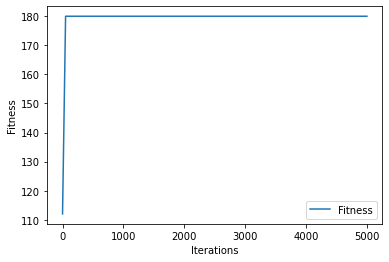

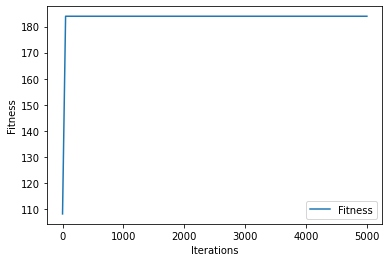

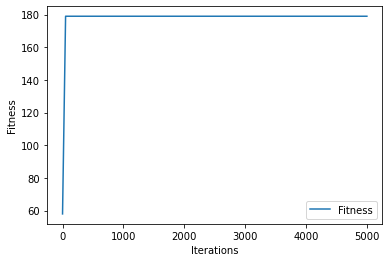

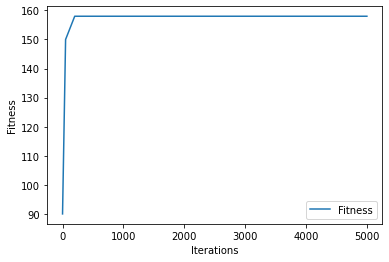

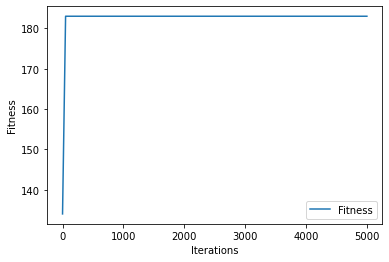

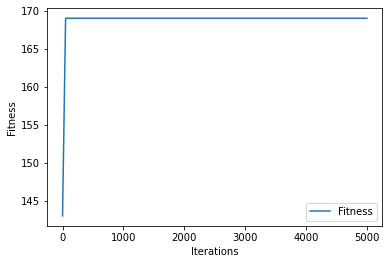

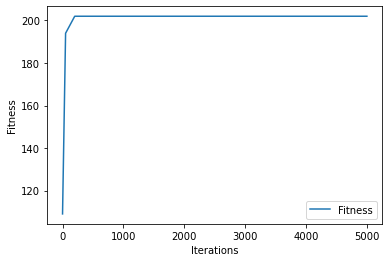

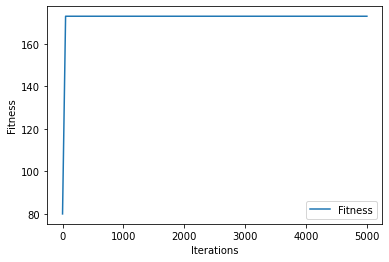

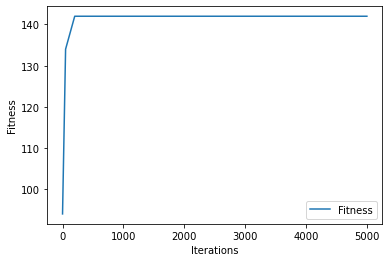

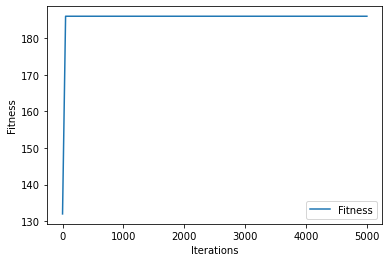

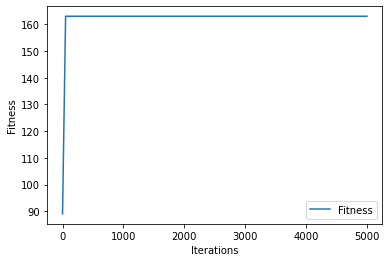

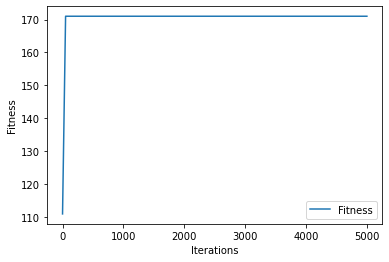

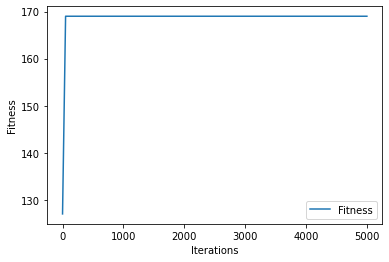

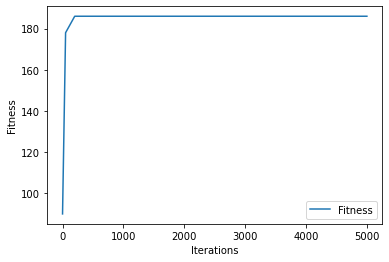

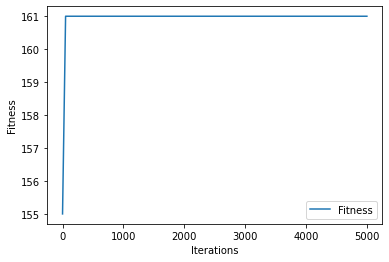

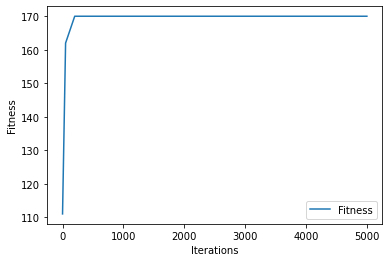

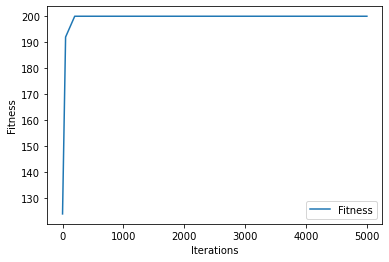

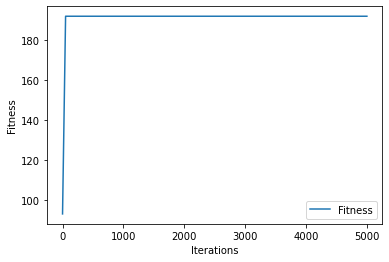

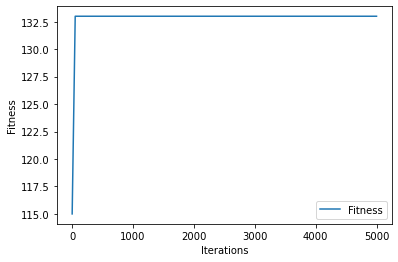

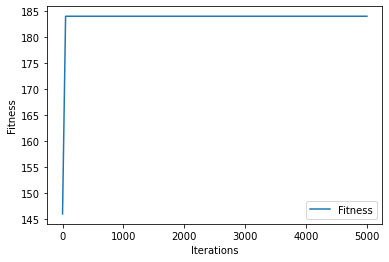

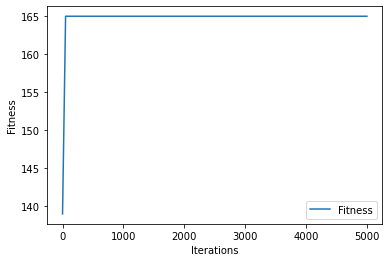

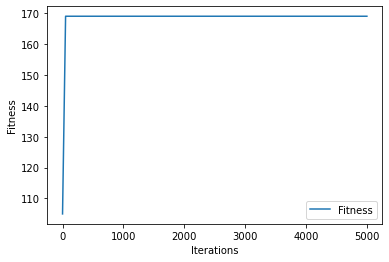

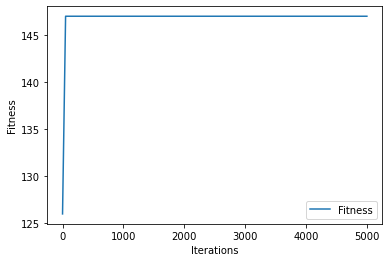

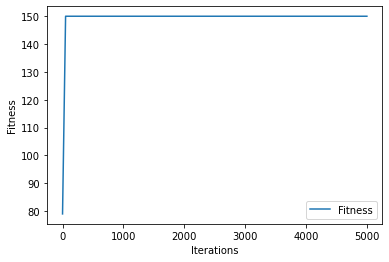

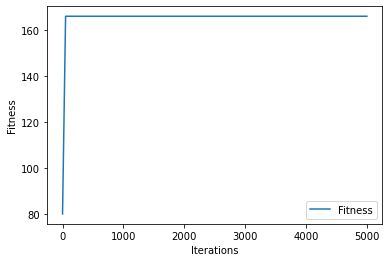

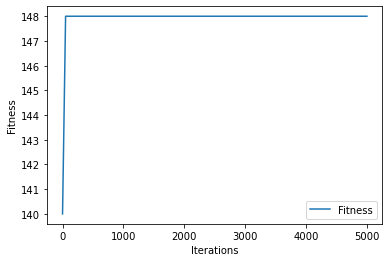

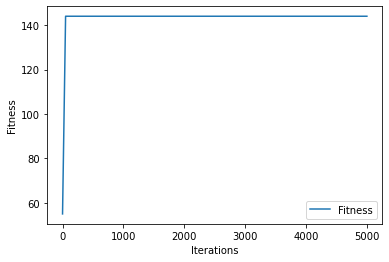

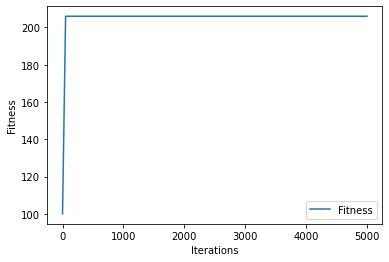

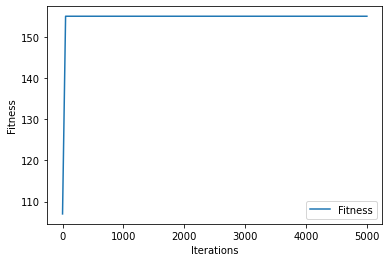

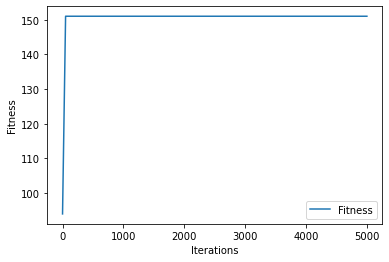

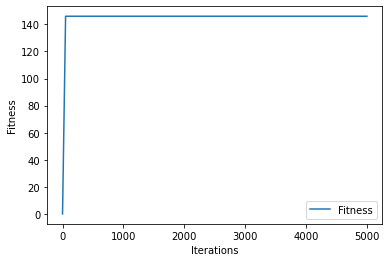

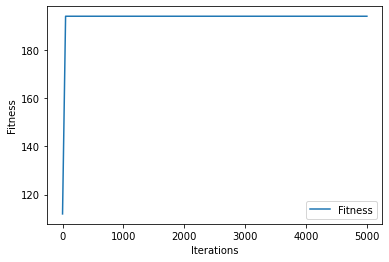

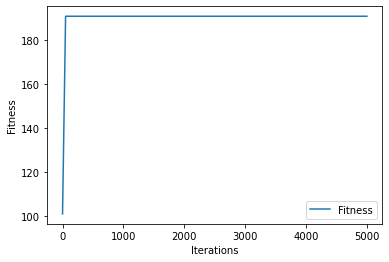

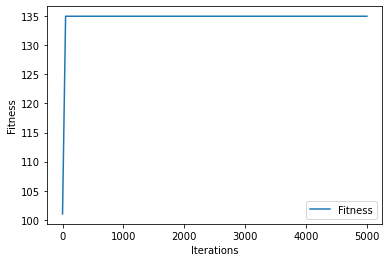

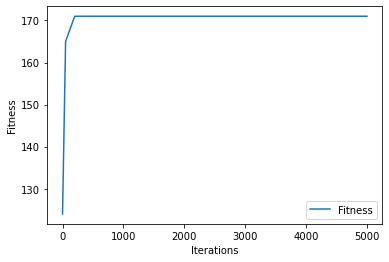

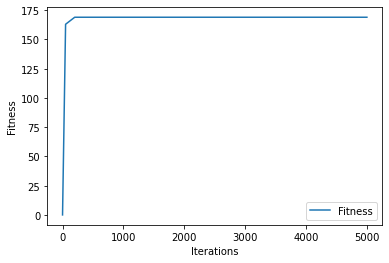

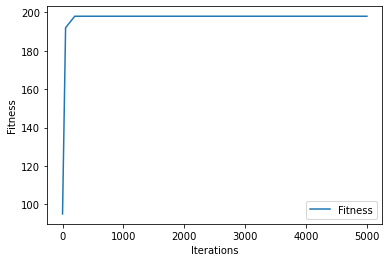

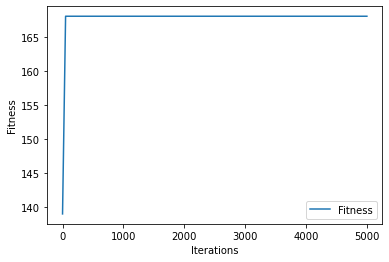

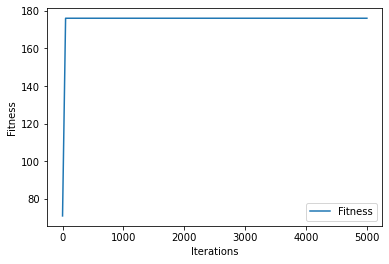

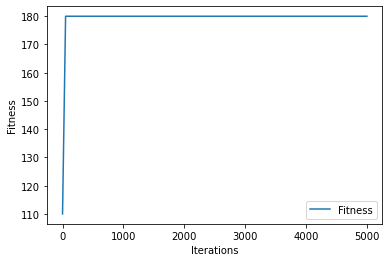

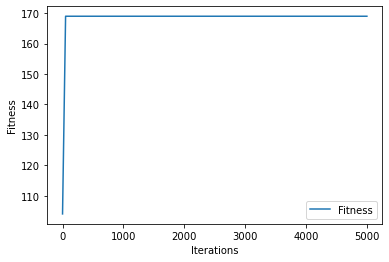

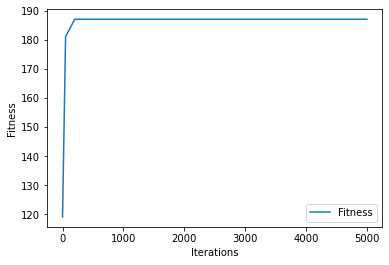

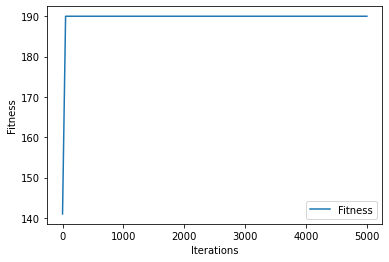

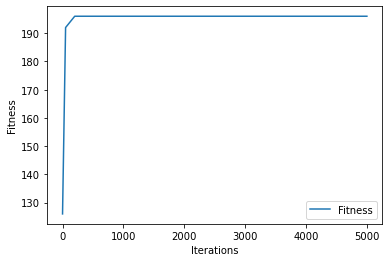

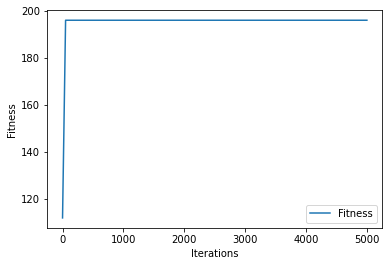

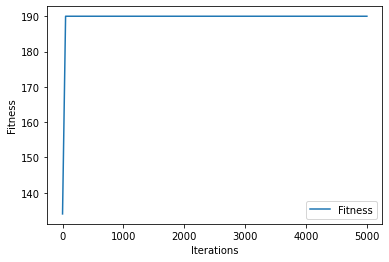

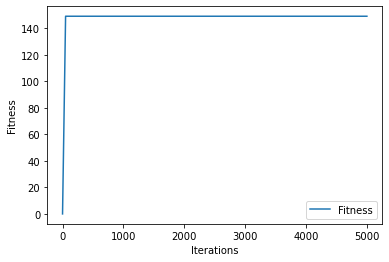

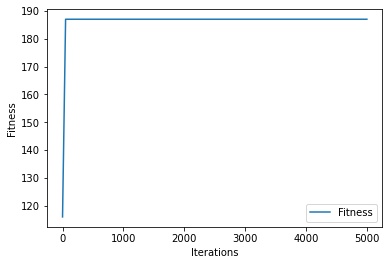

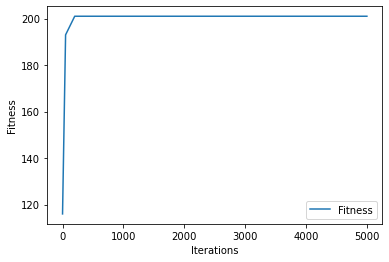

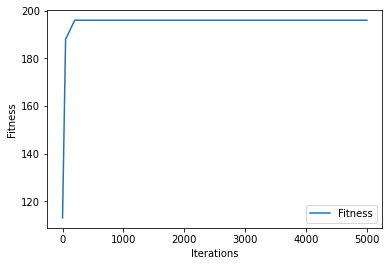

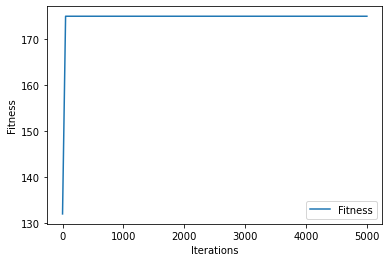

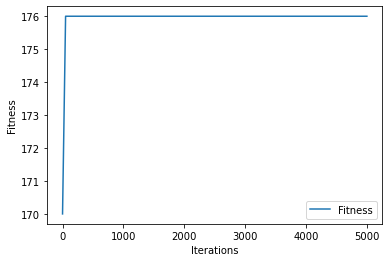

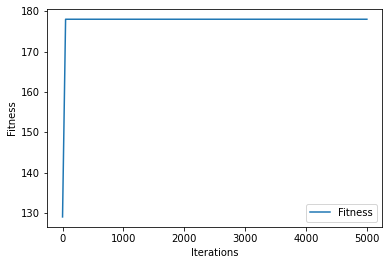

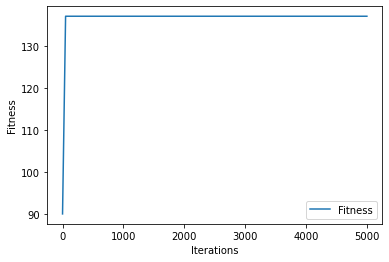

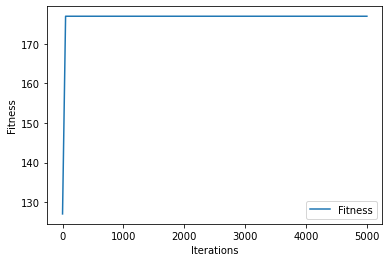

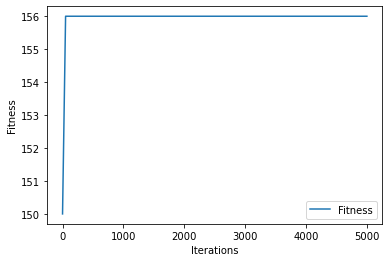

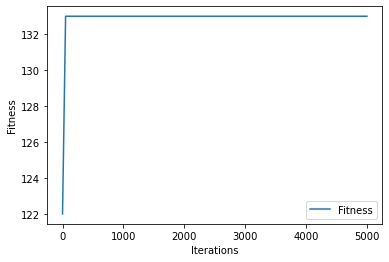

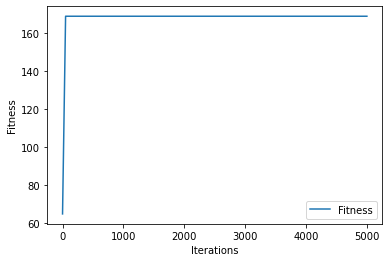

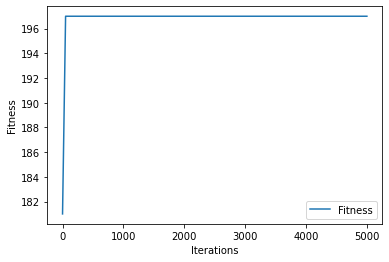

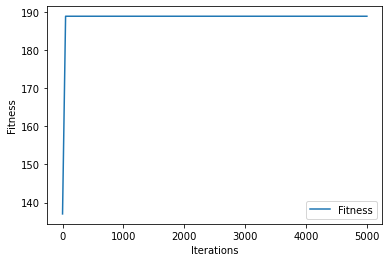

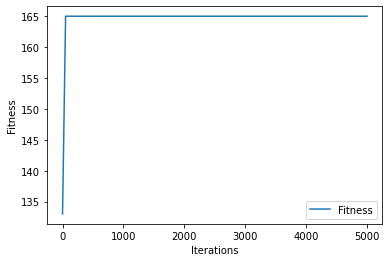

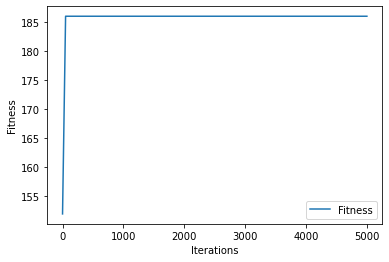

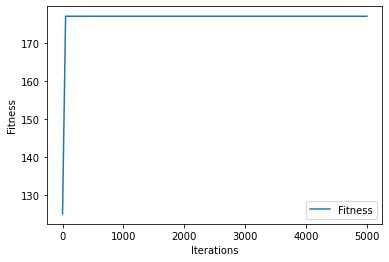

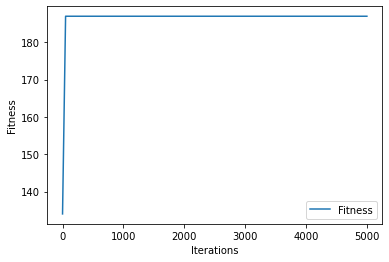

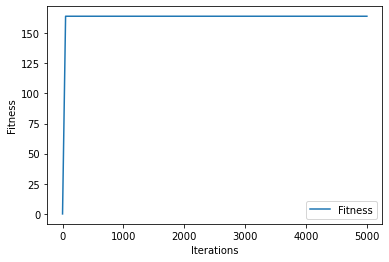

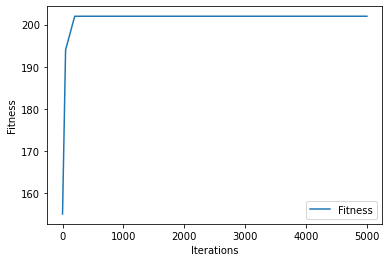

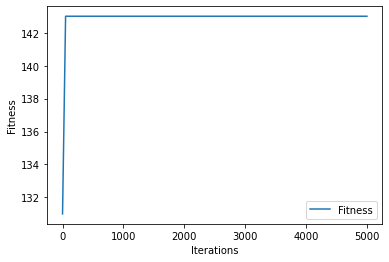

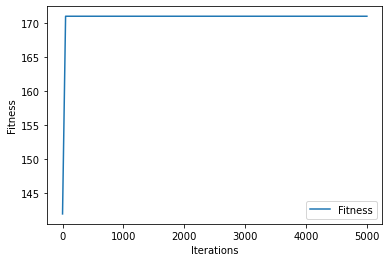

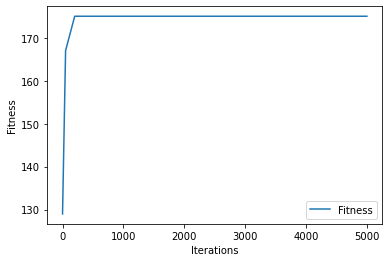

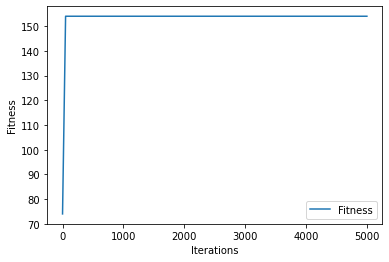

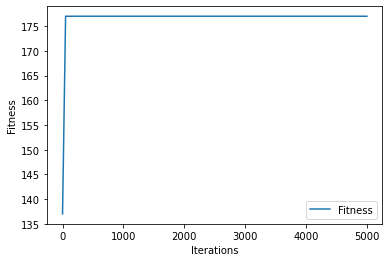

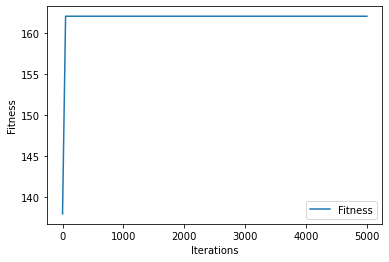

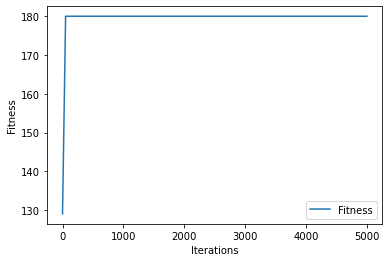

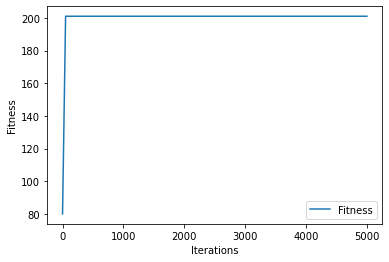

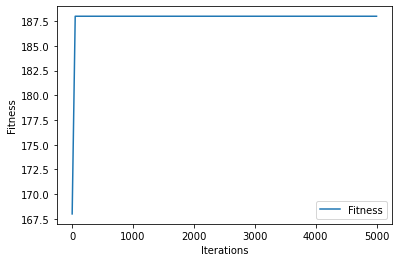

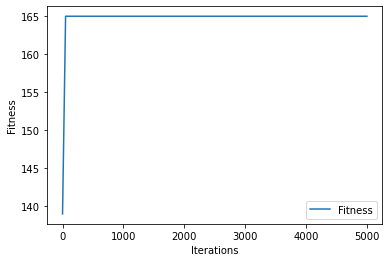

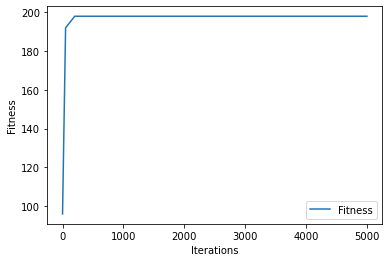

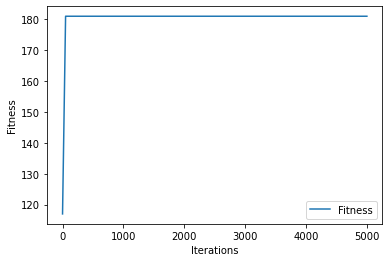

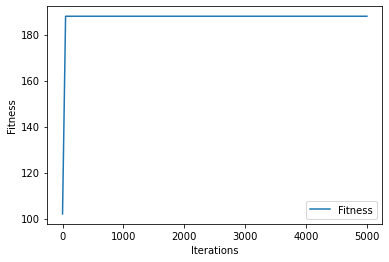

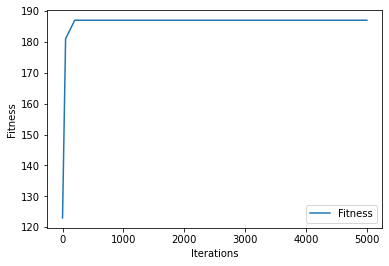

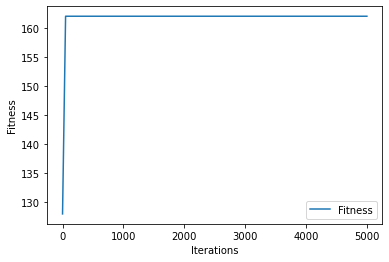

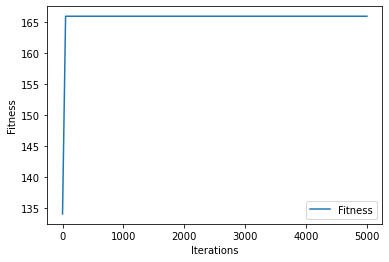

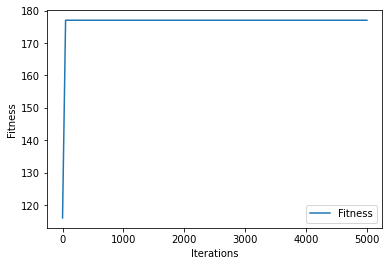

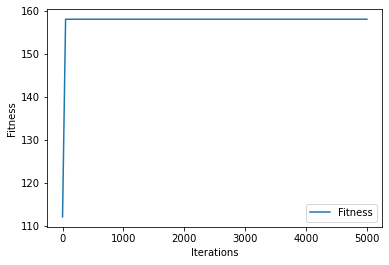

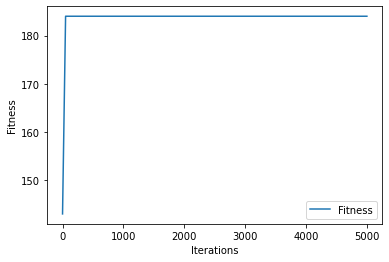

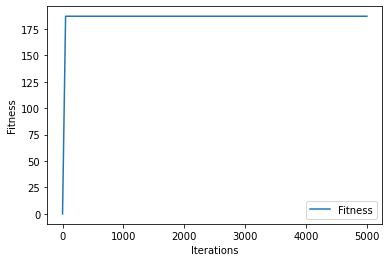

In [92]:
# k_rhc_stats_100[k_rhc_stats_100.Restarts == 100].set_index('Iteration')['Fitness'].plot()
# k_rhc_stats_100[k_rhc_stats_100.Restarts == 150][k_rhc_stats_100.current_restart == 150].set_index('Iteration')['Fitness'].plot()
k_rhc_stats_100.groupby(['Restarts', 'current_restart']).plot(xlabel='Iterations', ylabel='Fitness', y='Fitness', x='Iteration', sharey=True)

In [10]:
PROBLEM_SIZE = 500
problem = mlrose_hiive.KnapsackGenerator().generate(42, number_of_items_types=20, max_item_count=10)
restarts = [1, 10, 50, 100, 150]
rh_runner = mlrose_hiive.RHCRunner(problem, seed=42, experiment_name='RHC_Knapsack_100',
                                  iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5, 5000], output_directory='output',
                                  max_attempts=10, restart_list=restarts)
k_rhc_stats_500, k_rhc_curve_500 = rh_runner.run()

In [11]:
k_rhc_stats_500[k_rhc_stats_500.Fitness == k_rhc_stats_500.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
726,250.0,822.0,3609,6.728056,"[9, 9, 5, 6, 4, 9, 9, 8, 1, 8, 8, 9, 1, 8, 6, ...",100,5000,81
727,1000.0,822.0,3609,6.728056,"[9, 9, 5, 6, 4, 9, 9, 8, 1, 8, 8, 9, 1, 8, 6, ...",100,5000,81
728,2500.0,822.0,3609,6.728056,"[9, 9, 5, 6, 4, 9, 9, 8, 1, 8, 8, 9, 1, 8, 6, ...",100,5000,81
729,5000.0,822.0,3609,6.728056,"[9, 9, 5, 6, 4, 9, 9, 8, 1, 8, 8, 9, 1, 8, 6, ...",100,5000,81
1231,250.0,822.0,3609,10.374531,"[9, 9, 5, 6, 4, 9, 9, 8, 1, 8, 8, 9, 1, 8, 6, ...",150,5000,81
1232,1000.0,822.0,3609,10.374531,"[9, 9, 5, 6, 4, 9, 9, 8, 1, 8, 8, 9, 1, 8, 6, ...",150,5000,81
1233,2500.0,822.0,3609,10.374531,"[9, 9, 5, 6, 4, 9, 9, 8, 1, 8, 8, 9, 1, 8, 6, ...",150,5000,81
1234,5000.0,822.0,3609,10.374531,"[9, 9, 5, 6, 4, 9, 9, 8, 1, 8, 8, 9, 1, 8, 6, ...",150,5000,81


<AxesSubplot:xlabel='Restarts Problem size 500', ylabel='Fitness'>

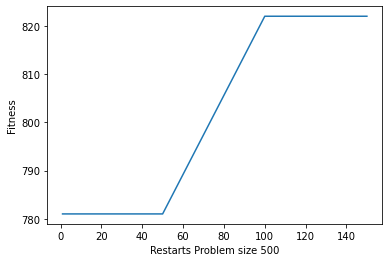

In [229]:
k_rhc_stats_500.groupby(['Restarts']).max()['Fitness'].plot(xlabel='Restarts Problem size 500', ylabel='Fitness')

<AxesSubplot:xlabel='Iteration', ylabel='Fitness problem size 20'>

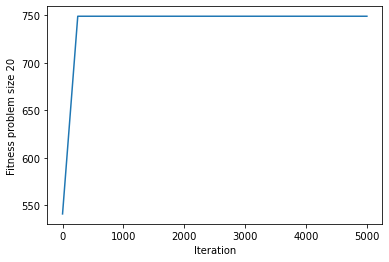

In [94]:
k_rhc_stats_500[k_rhc_stats_500.Restarts == 150][k_rhc_stats_500.current_restart == 150].set_index('Iteration')['Fitness'].plot(ylabel='Fitness problem size 20')
# k_rhc_stats_100.groupby(['Restarts', 'current_restart']).plot(xlabel='Iterations', ylabel='Fitness', y='Fitness', x='Iteration', sharey=True)

In [40]:
decay = ExpDecay(init_temp=10000, exp_const=0.5)
sa_best_state, sa_best_fitness, sa_curve = simulated_annealing(problem, schedule=decay, curve=True)
print(sa_best_fitness, sa_curve.shape)

752.0 (1136, 2)


In [12]:
PROBLEM_SIZE = 100

In [13]:
problem = mlrose_hiive.KnapsackGenerator().generate(42)
init_temp = [1, 10, 25]
sa_runner = mlrose_hiive.SARunner(problem,
                           seed=42,
                           output_directory='output',
                           experiment_name='SA_knapsack_100',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5, 10000],
                           temperature_list=init_temp,
                           decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay],
                           )
sa_stats, sa_curve = sa_runner.run()

In [111]:
print(sa_stats[sa_stats.schedule_type=='exponential'].max()['Fitness'])
print(sa_stats[sa_stats.schedule_type=='geometric'].max()['Fitness'])

print(sa_5_stats[sa_stats.schedule_type=='exponential'].max()['Fitness'])
print(sa_5_stats[sa_stats.schedule_type=='geometric'].max()['Fitness'])

200.0
205.0
833.0
839.0


In [132]:
sa_curve[sa_curve.max_iters == 10000].head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters,init_temp
0,0,0.000096,177.0,0.0,1,10000,1
1,1,0.005740,177.0,1.0,1,10000,1
2,2,0.005821,177.0,2.0,1,10000,1
3,3,0.005880,180.0,4.0,1,10000,1
4,4,0.005921,180.0,5.0,1,10000,1


In [123]:
sa_curve.Temperature.values

array([GeomDecay(init_temp=1, decay=0.99, min_temp=0.001),
       GeomDecay(init_temp=1, decay=0.99, min_temp=0.001),
       GeomDecay(init_temp=1, decay=0.99, min_temp=0.001), ...,
       ExpDecay(init_temp=25, exp_const=0.005, min_temp=0.001),
       ExpDecay(init_temp=25, exp_const=0.005, min_temp=0.001),
       ExpDecay(init_temp=25, exp_const=0.005, min_temp=0.001)],
      dtype=object)

Text(0.5, 1.0, 'Fitness vs Initial Temp Problem size 5')

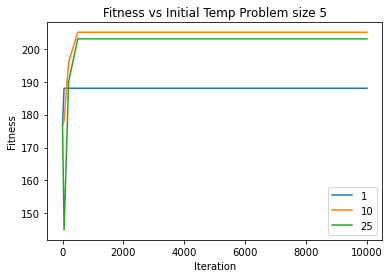

In [141]:
fig, ax = plt.subplots(1, 1)
for temp in init_temp:
    best_curve = sa_stats[sa_stats.schedule_init_temp == temp]
    best_curve = best_curve[sa_stats.max_iters == 10000]
    best_curve = best_curve[sa_stats.schedule_type == 'geometric']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='Fitness', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Fitness vs Initial Temp Problem size 5")

Text(0.5, 1.0, 'Time vs Initial Temp Problem size 20')

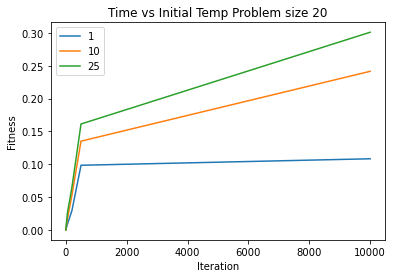

In [157]:
fig, ax = plt.subplots(1, 1)
for temp in init_temp:
    best_curve = sa_stats[sa_stats.schedule_init_temp == temp]
    best_curve = best_curve[best_curve.max_iters == 10000]
    best_curve = best_curve[best_curve.schedule_type == 'geometric']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='Time', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Time vs Initial Temp Problem size 20")

In [19]:
PROBLEM_SIZE = 500
problem = mlrose_hiive.KnapsackGenerator().generate(42, number_of_items_types=20, max_item_count=10)
init_temp = [1, 10, 25]
sa_runner = mlrose_hiive.SARunner(problem,
                           seed=42,
                           output_directory='output',
                           experiment_name='SA_KS_500',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5, 10000],
                           temperature_list=init_temp,
                           decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])
sa_5_stats, sa_5_curve = sa_runner.run()

In [20]:
sa_5_stats[sa_5_stats.Fitness == sa_5_stats.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
22,1000.0,839.0,1040,0.303762,"[8, 9, 0, 6, 1, 9, 8, 7, 0, 9, 0, 9, 8, 9, 9, ...",geometric,25,0.99,0.001,24.923794,25,10000,NaN
23,2500.0,839.0,1040,0.303762,"[8, 9, 0, 6, 1, 9, 8, 7, 0, 9, 0, 9, 8, 9, 9, ...",geometric,25,0.99,0.001,24.923794,25,10000,NaN
24,10000.0,839.0,1040,0.303762,"[8, 9, 0, 6, 1, 9, 8, 7, 0, 9, 0, 9, 8, 9, 9, ...",geometric,25,0.99,0.001,24.923794,25,10000,NaN


Text(0.5, 1.0, 'Fitness vs Initial Temp Problem size 20')

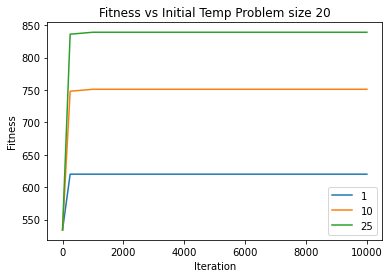

In [144]:
fig, ax = plt.subplots(1, 1)
for temp in init_temp:
    best_curve = sa_5_stats[sa_5_stats.schedule_init_temp == temp]
    best_curve = best_curve[best_curve.max_iters == 10000]
    best_curve = best_curve[best_curve.schedule_type == 'geometric']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='Fitness', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Fitness vs Initial Temp Problem size 20")

Text(0.5, 1.0, 'Time vs Initial Temp Problem size 20')

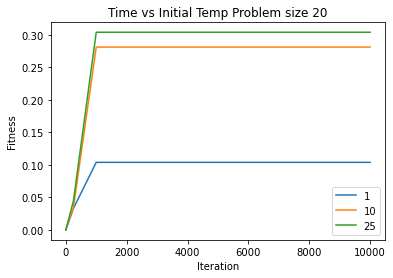

In [147]:
fig, ax = plt.subplots(1, 1)
for temp in init_temp:
    best_curve = sa_5_stats[sa_5_stats.schedule_init_temp == temp]
    best_curve = best_curve[sa_5_stats.max_iters == 10000]
    best_curve = best_curve[sa_5_stats.schedule_type == 'geometric']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='Time', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Time vs Initial Temp Problem size 20")

In [17]:
ga_best_state, ga_best_fitness, ga_curve = genetic_alg(problem, curve=True)

In [42]:
print(ga_best_fitness, ga_curve.shape)

572.0 (11, 2)


In [15]:
PROBLEM_SIZE = 100
problem = problem = mlrose_hiive.KnapsackGenerator().generate(42)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
ga_runner = mlrose_hiive.GARunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='GA_KS_100',
                           population_sizes=population, mutation_rates=[0.1, 0.3, 0.5])
ga_stats_100, ga_curve_100 = ga_runner.run()

In [166]:
ga_stats_100[ga_stats_100.Fitness == ga_stats_100.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
9,50.0,211.0,2606,0.179347,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",50.0,0.5,500
10,200.0,211.0,10256,0.684228,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",50.0,0.5,500
11,500.0,211.0,25556,1.566887,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",50.0,0.5,500
13,50.0,211.0,10256,0.543478,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",200.0,0.1,500
14,200.0,211.0,40406,2.208523,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",200.0,0.1,500
15,500.0,211.0,100706,5.627391,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",200.0,0.1,500
17,50.0,211.0,10255,0.654955,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",200.0,0.3,500
18,200.0,211.0,40405,2.339132,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",200.0,0.3,500
19,500.0,211.0,100705,5.761051,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",200.0,0.3,500
21,50.0,211.0,10256,0.676849,"[4, 4, 4, 4, 4, 1, 4, 4, 0, 4]",200.0,0.5,500


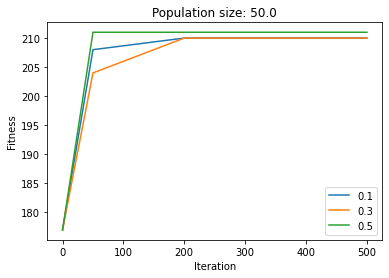

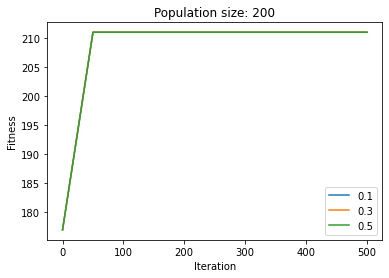

In [180]:
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_100[ga_stats_100['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

In [17]:
PROBLEM_SIZE = 500
problem = mlrose_hiive.KnapsackGenerator().generate(42, number_of_items_types=20, max_item_count=10)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
ga_runner = mlrose_hiive.GARunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='GA_KS_500',
                           population_sizes=population, mutation_rates=[0.1, 0.3, 0.5])
ga_stats_500, ga_curve_500 = ga_runner.run()

In [18]:
ga_stats_500[ga_stats_500.Fitness == ga_stats_500.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
9,250.0,892.0,63021,3.557202,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 8, 9, 0, 9, 9, ...",250.0,0.5,2500
10,1000.0,892.0,181995,10.581076,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 8, 9, 0, 9, 9, ...",250.0,0.5,2500
11,2500.0,892.0,181995,10.581076,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 8, 9, 0, 9, 9, ...",250.0,0.5,2500
13,250.0,892.0,251267,14.855123,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 8, 9, 0, 9, 9, ...",1000.0,0.1,2500
14,1000.0,892.0,565581,33.460028,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 8, 9, 0, 9, 9, ...",1000.0,0.1,2500
15,2500.0,892.0,565581,33.460028,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 8, 9, 0, 9, 9, ...",1000.0,0.1,2500
17,250.0,892.0,251269,15.033302,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 8, 9, 0, 9, 9, ...",1000.0,0.3,2500
18,1000.0,892.0,555573,33.443590,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 8, 9, 0, 9, 9, ...",1000.0,0.3,2500
19,2500.0,892.0,555573,33.443590,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 8, 9, 0, 9, 9, ...",1000.0,0.3,2500
21,250.0,892.0,251271,15.431037,"[9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 9, 9, 0, 9, 8, ...",1000.0,0.5,2500


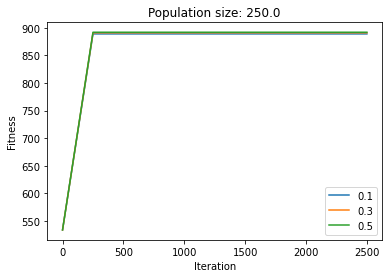

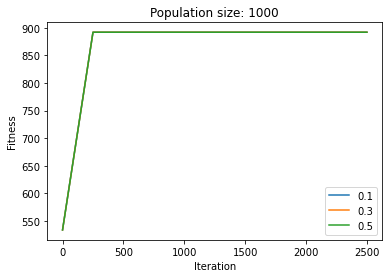

In [181]:
PROBLEM_SIZE = 500
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_500[ga_stats_500['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

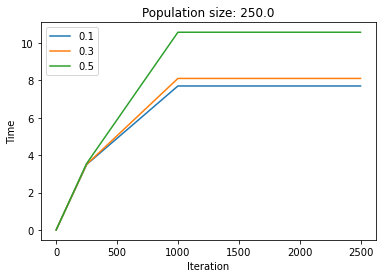

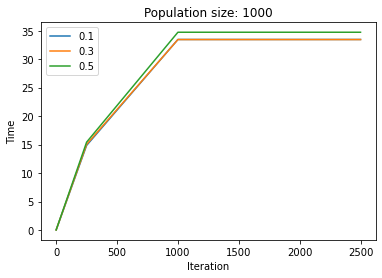

In [182]:
PROBLEM_SIZE = 500
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_500[ga_stats_500['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

In [44]:
m_best_state, m_best_fitness, m_curve = mimic(problem, curve=True)
print(m_best_fitness, m_curve.shape)

750.0 (36, 2)


In [49]:
problem = DiscreteOpt(length=100, fitness_fn=fitness)
mimic(problem, max_iters=10)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 99.0,
 None)

In [197]:
PROBLEM_SIZE = 100
problem = mlrose_hiive.KnapsackGenerator().generate(42)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
m_runner = mlrose_hiive.MIMICRunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='mimc_ks_100',
                           keep_percent_list=[0.25, 0.5, 0.75]
                                    , population_sizes=population
                            , use_fast_mimic=True)
m_stats_100, m_curve_100 = m_runner.run()

In [209]:
# m_stats_100[m_stats_100.Fitness == m_stats_100.Fitness.max()]
import os
print(os.getcwd())
m_stats_100 = pd.read_csv(f'{os.getcwd()}\\output\\mimc_ks_100\\mimic__mimc_ks_100__run_stats_df.csv')

C:\projects\omscs\cs7641\cs7641-projects\project2


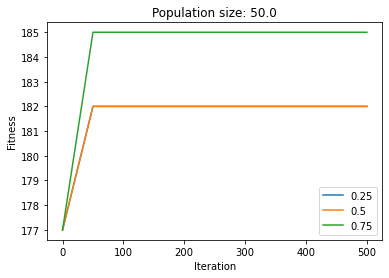

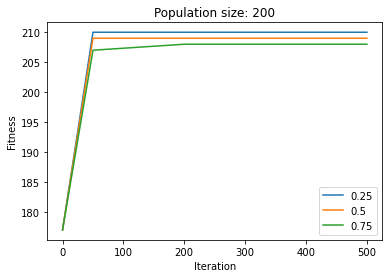

In [211]:
PROBLEM_SIZE = 100
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_100[m_stats_100['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")

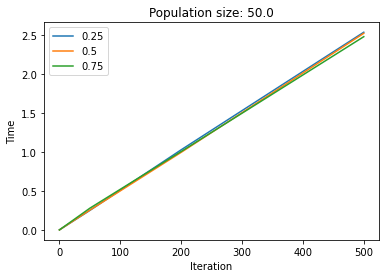

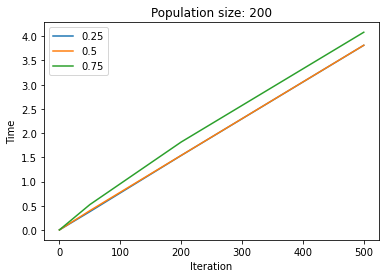

In [212]:
PROBLEM_SIZE = 100
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_100[m_stats_100['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")

In [223]:
PROBLEM_SIZE = 500
problem = mlrose_hiive.KnapsackGenerator().generate(42, number_of_items_types=20, max_item_count=10)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*3]
m_runner = mlrose_hiive.MIMICRunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='mimc_ks_500',
                           keep_percent_list=[0.25, 0.5, 0.75]
                                    , population_sizes=population
                            , use_fast_mimic=True)
m_stats_500, m_curve_500 = m_runner.run()

In [225]:
m_stats_500 = pd.read_csv(f'{os.getcwd()}\\output\\mimc_ks_500\\mimic__mimc_ks_500__run_stats_df.csv')

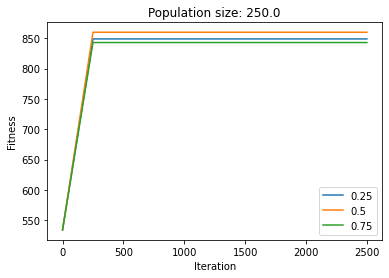

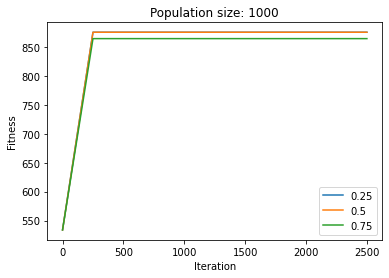

In [227]:
PROBLEM_SIZE = 500
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_500[m_stats_500['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")

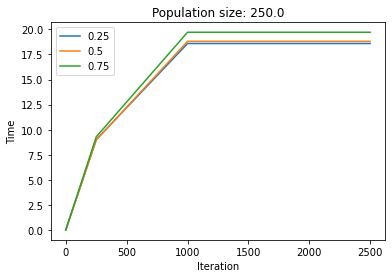

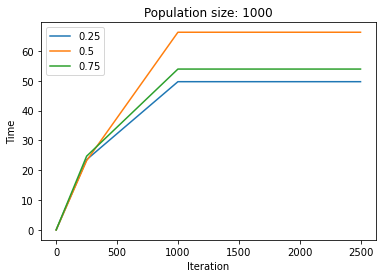

In [228]:
PROBLEM_SIZE = 500
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_500[m_stats_500['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")